<a href="https://colab.research.google.com/github/rajkumarshahu/AI-Colab/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Predictive Analysis for Heart Disease:</h1>
<h2>Evaluating Machine Learning Models</h2></br>
<p><b>Group 11:</b></p>
<p>Raj Shahu, Tej Subedi and Rajesh Bista</p>


In [ ]:
# !pip install shap

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# import shap
import xgboost as xgb

#Data Exploration and Cleaning

#### Load the data

In [ ]:
data = pd.read_csv("/content/heart_2022_with_nans.csv", delimiter=None, engine='python')
print(data.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0          NaN             

#### Summary statistics

In [ ]:
summary_statistics = data.describe(include='all')
summary_statistics

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,445132,445132,443934,434205.000000,436065.000000,436824,444039,439679.000000,433772,442067,...,416480.000000,403054.000000,396326.000000,398558,379005,398011,368092,362616,394509,394368
unique,54,2,5,NaN,NaN,4,2,NaN,4,2,...,NaN,NaN,NaN,2,2,2,2,4,2,3
top,Washington,Female,Very good,NaN,NaN,Within past year (anytime less than 12 months ...,Yes,NaN,None of them,No,...,NaN,NaN,NaN,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,26152,235893,148444,NaN,NaN,350944,337559,NaN,233455,416959,...,NaN,NaN,NaN,210891,249919,209256,215604,121493,377324,270055
mean,NaN,NaN,NaN,4.347919,4.382649,NaN,NaN,7.022983,NaN,NaN,...,1.702691,83.074470,28.529842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,8.688912,8.387475,NaN,NaN,1.502425,NaN,NaN,...,0.107177,21.448173,6.554889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,...,0.910000,22.680000,12.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,6.000000,NaN,NaN,...,1.630000,68.040000,24.130000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,7.000000,NaN,NaN,...,1.700000,80.740000,27.440000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000,5.000000,NaN,NaN,8.000000,NaN,NaN,...,1.780000,95.250000,31.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def describe_df(df: pd.DataFrame):
    print(f"The dataset contains {df.shape[1]} columns and {len(df)} rows")

    for col in df.columns:
        col_dtype = df[col].dtype

        print(f"\nColumn: {col} ({col_dtype})")
        if col_dtype == 'object':
            print(f"--- Percentage of NaNs: {df[col].isna().sum() / len(df[col]) * 100}")
            print(f"--- Unique values:\n {df[col].unique()}")
        else:
            print(f"--- Summary statistics:\n {df[col].describe()}")

In [ ]:
describe_df(data)

The dataset contains 40 columns and 445132 rows

Column: State (object)
--- Percentage of NaNs: 0.0
--- Unique values:
 ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

Column: Sex (object)
--- Percentage of NaNs: 0.0
--- Unique values:
 ['Female' 'Male']

Column: GeneralHealth (object)
--- Percentage of NaNs: 0.26913365024307395
--- Unique values:
 ['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan]



#### Check and handle missing values

In [ ]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

print(f"numerical columns: {len(numerical_cols)}")

categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

print(f"categorical columns: {len(categorical_cols)}\n")

missing_values_after_handling = data.isnull().sum()

print(f"Columns after handing missing values:\n {missing_values_after_handling}")

numerical columns: 6
categorical columns: 34

Columns after handing missing values:
 State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory     

In [ ]:
print(categorical_cols)

Index(['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')


# Visualizing Data Distribution


#### 1. Outcome Variable

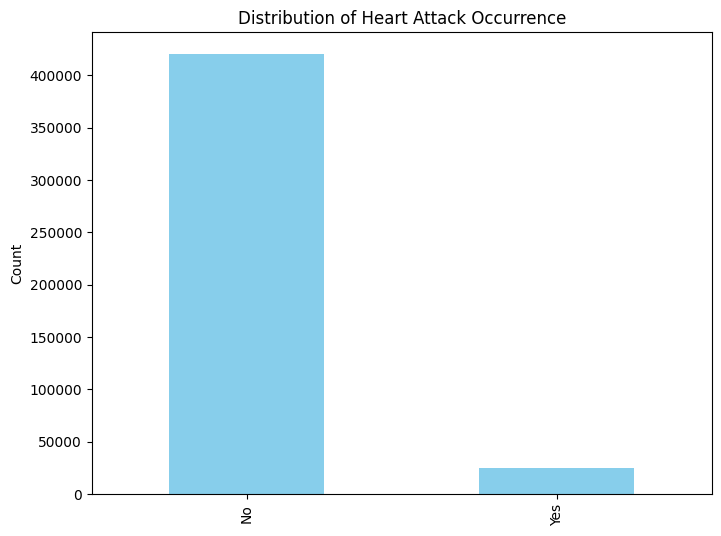

Total number of samples: 445132
______________________________
No     420024
Yes     25108
Name: HadHeartAttack, dtype: int64


In [ ]:
plt.figure(figsize=(8, 6))
data['HadHeartAttack'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Distribution of Heart Attack Occurrence')
plt.ylabel('Count')
plt.show()

print(f"Total number of samples: {data['HadHeartAttack'].value_counts().sum()}")
print("_"*30)
print(data['HadHeartAttack'].value_counts())


The analysis of this bar chart indicates a significant class imbalance between the occurrences of heart attacks within the dataset, which is a critical factor to consider in the predictive analysis for heart disease. Appropriate data preprocessing and model evaluation strategies should be employed to ensure that the predictive models perform well despite the class imbalance.

#### 2. Health Metrics

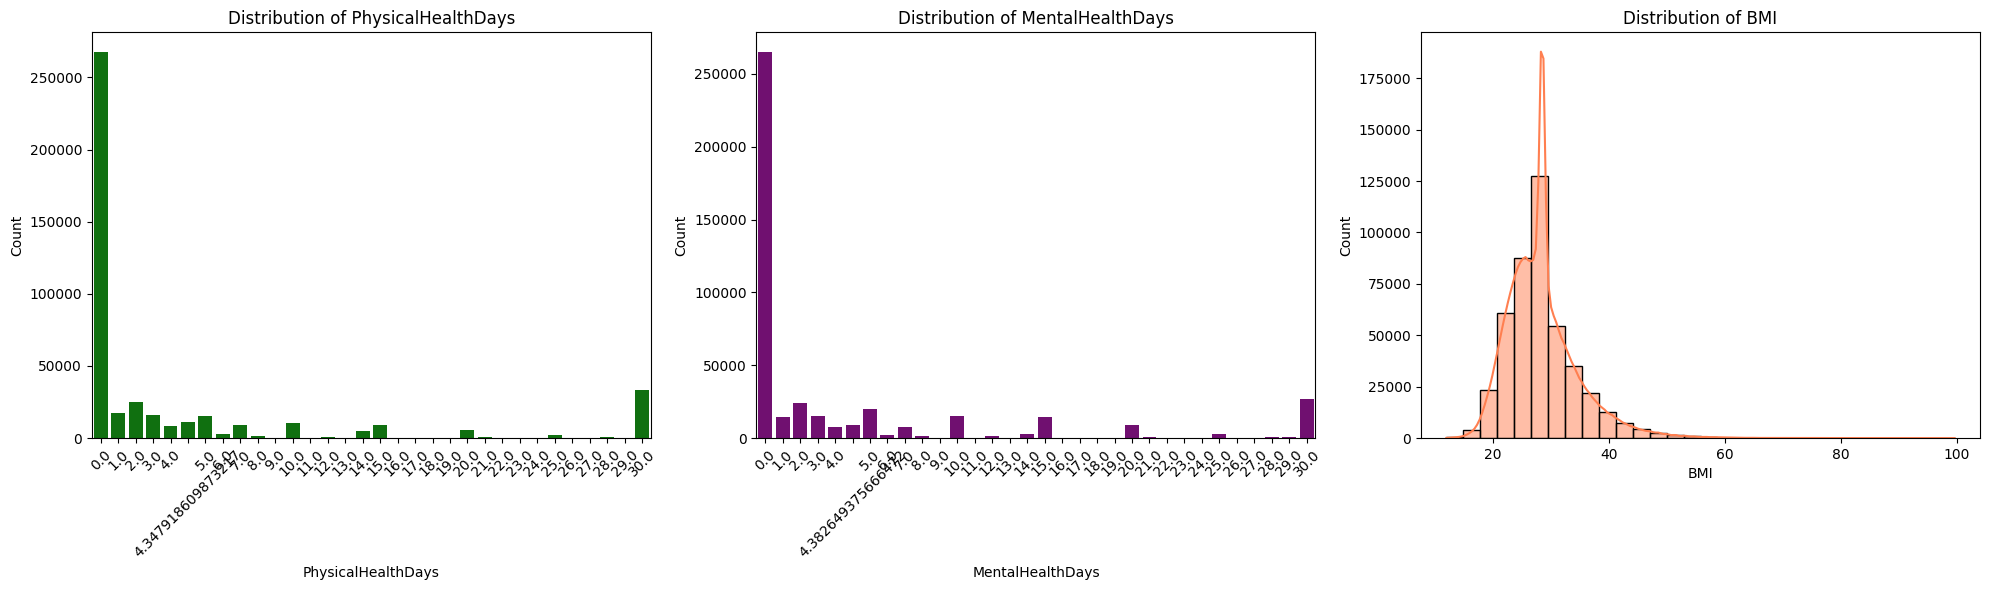

In [ ]:
plt.figure(figsize=(20, 6))

# 1. PhysicalHealthDays
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='PhysicalHealthDays', color='green')
plt.title('Distribution of PhysicalHealthDays')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis tick labels

# 2. MentalHealthDays
plt.subplot(1, 3, 2)
sns.countplot(data=data, x='MentalHealthDays', color='purple')
plt.title('Distribution of MentalHealthDays')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis tick labels

# 3. BMI
plt.subplot(1, 3, 3)
sns.histplot(data['BMI'], kde=True, color='coral', bins=30)
plt.title('Distribution of BMI')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Three subplots were created to visualize the distribution of health metrics:

- <b>PhysicalHealthDays</b>: This plot shows the distribution of the number of days subjects reported having physical health problems.
- <b>MentalHealthDays</b>: This plot shows the distribution of the number of days subjects reported having mental health issues.
- <b>BMI (Body Mass Index)</b>: A histogram was plotted to display the distribution of BMI values among the subjects.

We can visualize the general health metrics of the subjects in the dataset.

#### 3. Lifestyle Habits

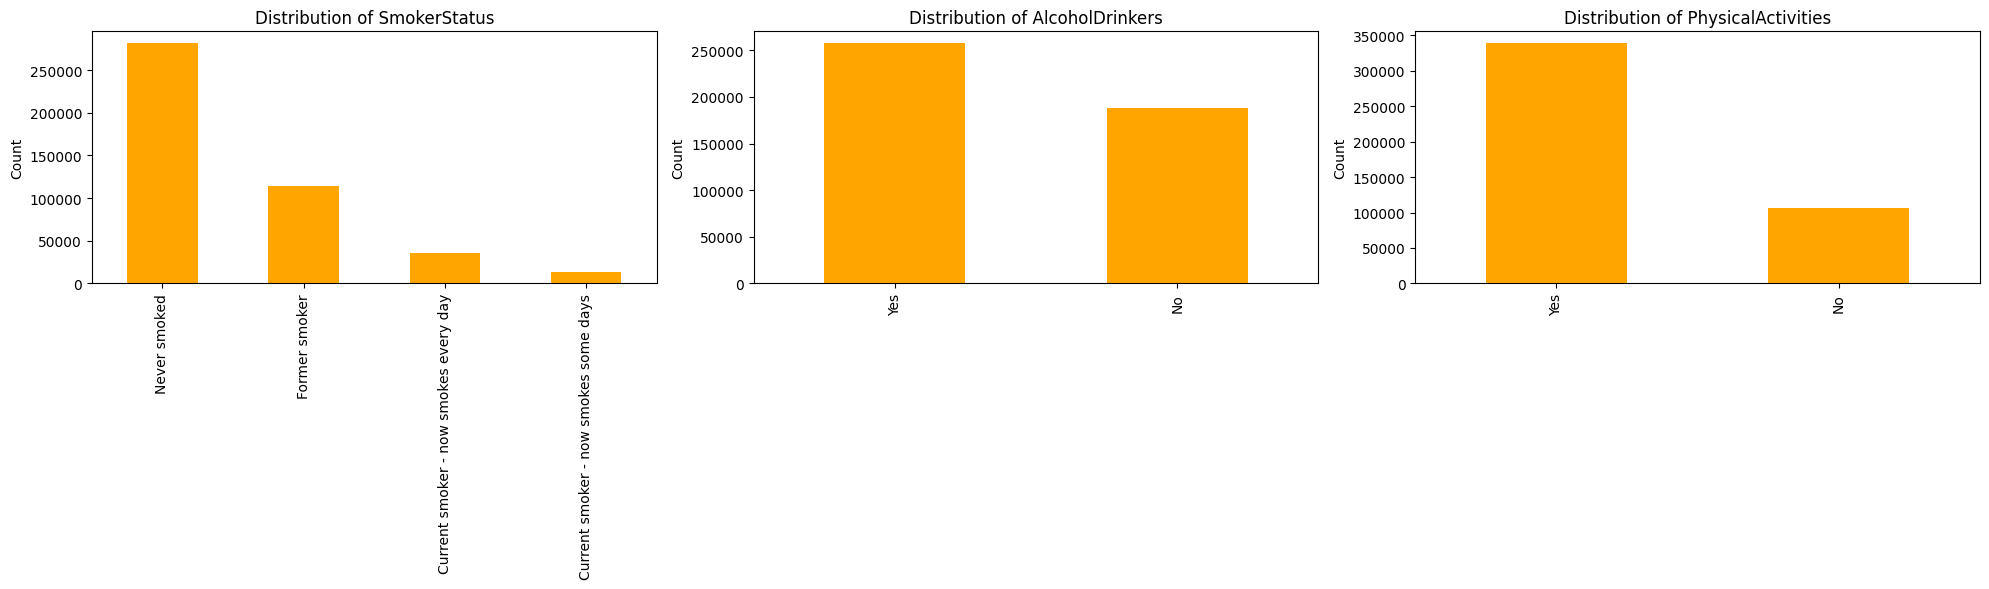

In [ ]:
plt.figure(figsize=(20, 6))
lifestyle_habits = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities']
for i, col in enumerate(lifestyle_habits, 1):
    plt.subplot(1, 3, i)
    data[col].value_counts().plot(kind='bar', color='orange')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

Three bar charts were plotted to visualize the distribution of various lifestyle habits among the subjects:

- <b>SmokerStatus</b>: Indicates the smoking status of subjects.
- <b>AlcoholDrinkers</b>: Represents subjects who consume alcohol.
- <b>PhysicalActivities</b>: Shows whether subjects engage in physical activities.

#### 4. Other Health Conditions

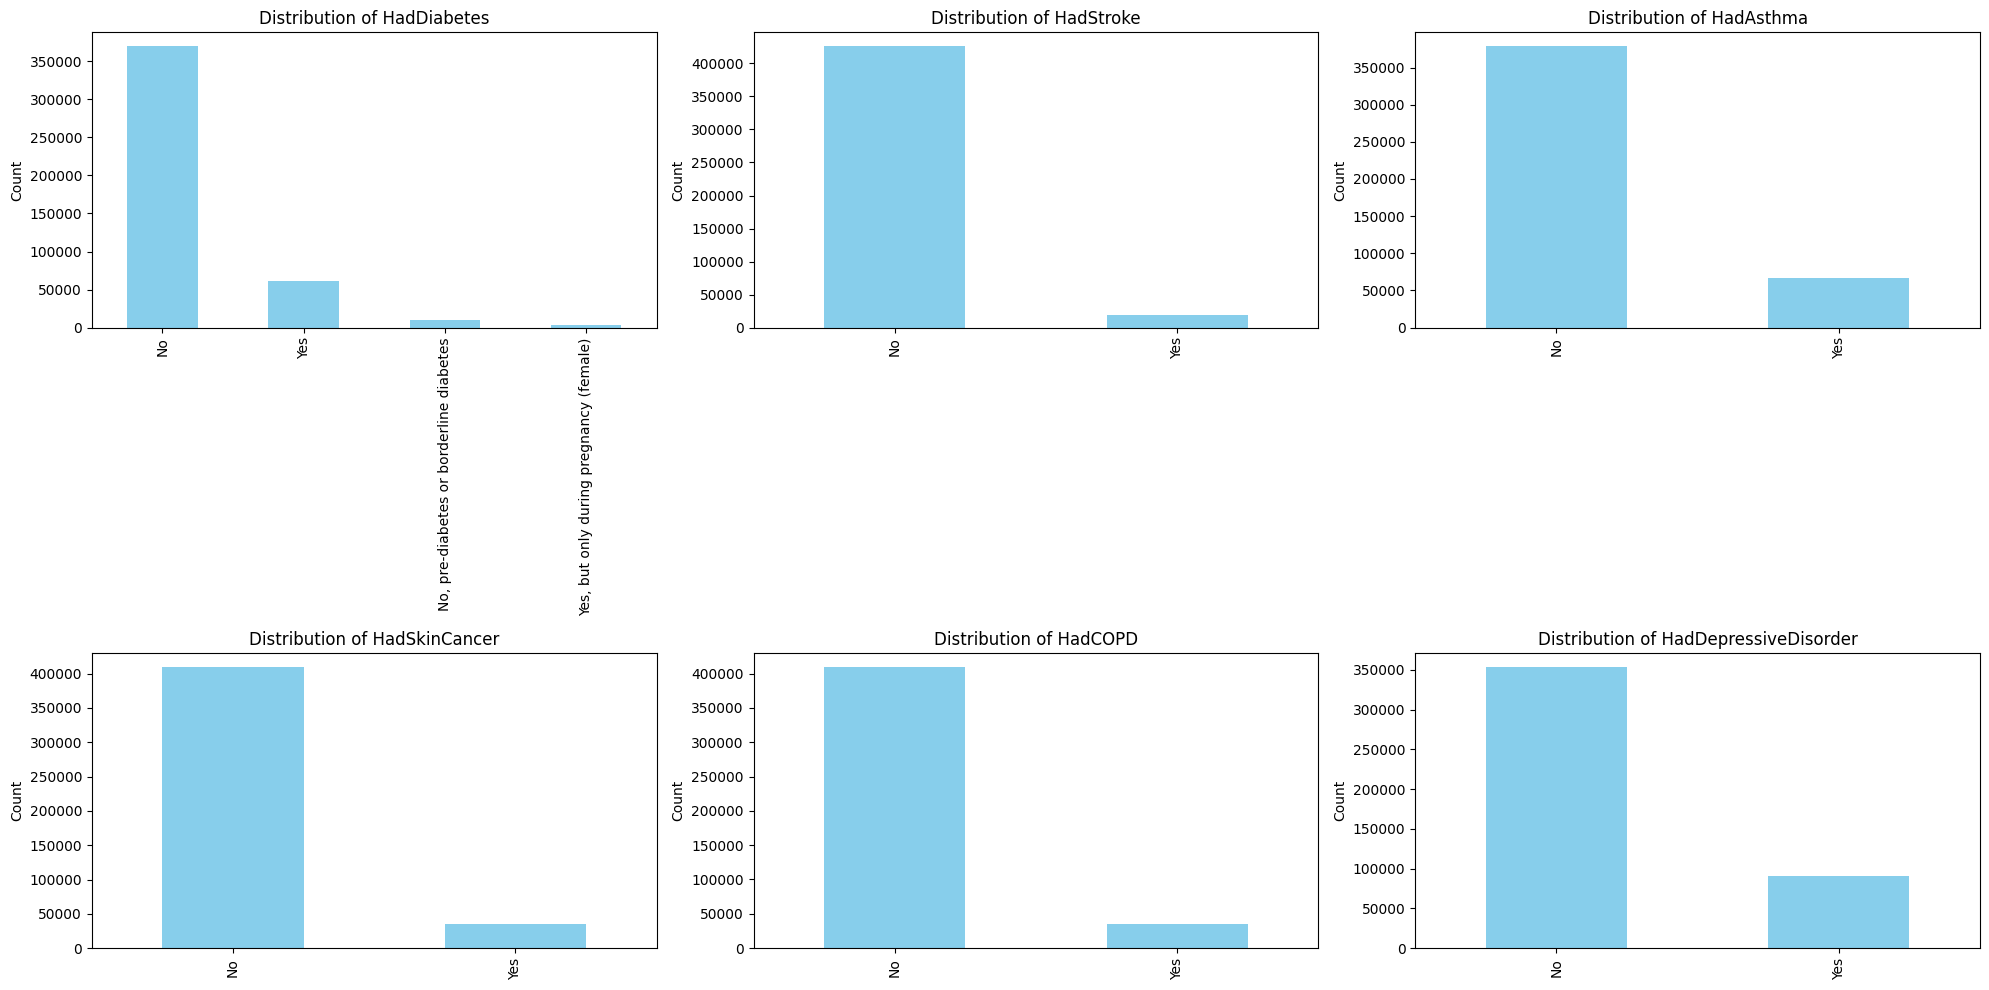

In [ ]:
plt.figure(figsize=(20, 10))
health_conditions = ['HadDiabetes', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder']
for i, col in enumerate(health_conditions, 1):
    plt.subplot(2, 3, i)
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

Six bar charts were generated to visualize the distribution of various health conditions among the subjects:

- <b> HadDiabetes</b>: Indicates if subjects have been diagnosed with diabetes.
- <b>HadStroke</b>: Represents subjects who have had a stroke.
- <b>HadAsthma</b>: Indicates subjects diagnosed with asthma.
- <b>HadSkinCancer</b>: Represents subjects who have had skin cancer.
- <b>HadCOPD (Chronic Obstructive Pulmonary Disease)</b>: Indicates if subjects have COPD.
- <b>HadDepressiveDisorder</b>: Represents subjects diagnosed with depressive disorder.

#### 5. General Health Perception

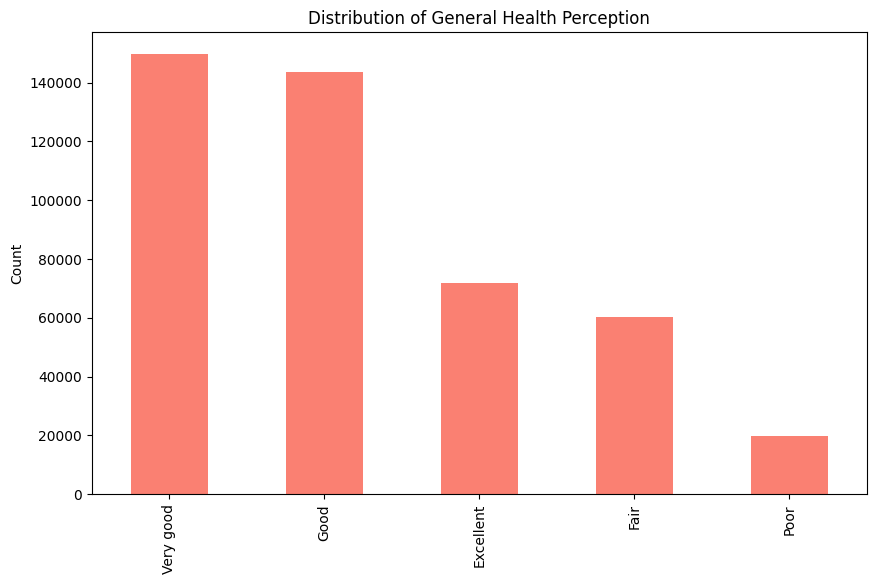

In [ ]:
plt.figure(figsize=(10, 6))
data['GeneralHealth'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of General Health Perception')
plt.ylabel('Count')
plt.show()

A bar chart was plotted to visualize the general health perception of the subjects. The categories range from "Excellent" to "Poor."

The visualizations provide a comprehensive understanding of the lifestyle habits, health conditions, and general health perception of the subjects in the dataset.

**Implications for Health Perception**:

* Positive Health Perception: The distribution shows a skew towards a positive health perception among the respondents, with "Very good" and "Good" being the most common responses.

* Potential Bias: Self-assessment data can be subject to bias, as individuals' perception of health can be influenced by various factors including personal expectations, cultural backgrounds, and social desirability.

* Relation to Heart Disease: In the context of predictive analysis for heart disease, this distribution suggests that self-perceived health status could be an interesting variable to include in models. However, the subjective nature of this measure means it should be used cautiously and in combination with more objective health indicators.



The analysis of this bar chart indicates that most individuals in this dataset have a positive perception of their health, with fewer reporting fair or poor health. When considering predictive analysis for heart disease, it is important to consider how subjective measures of health perception might correlate with objective health outcomes and how this could impact the performance of predictive models.

#### 6. Age Distribution

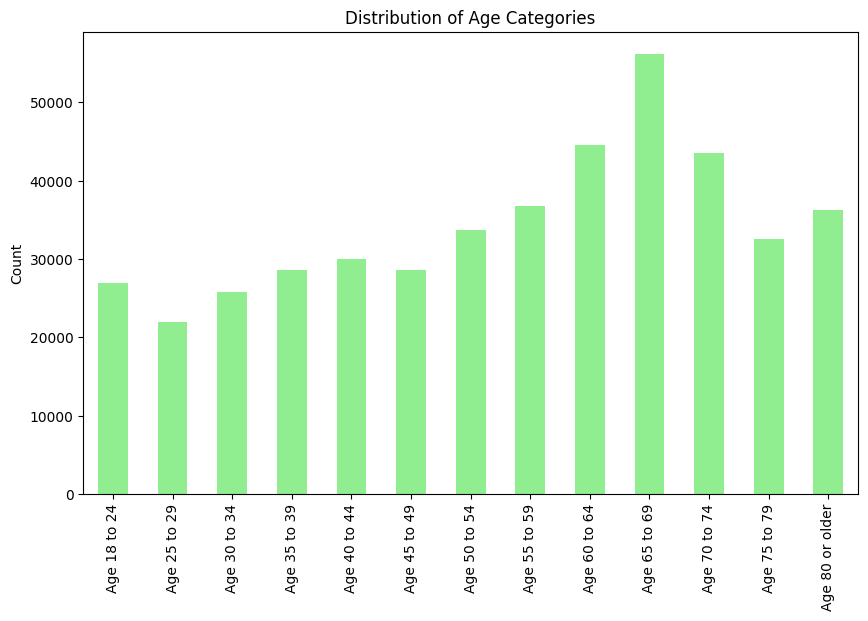

In [ ]:
plt.figure(figsize=(10, 6))
data['AgeCategory'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Age Categories')
plt.ylabel('Count')
plt.show()

A bar chart was constructed to visualize the distribution of age categories among the subjects. The age categories are represented in intervals, providing insights into the age distribution of the dataset.

**Implications**:

* Population Pyramid Shape: The distribution indicates a bulge in the middle to late-middle age brackets, which could reflect demographic trends such as the aging of the Baby Boomer generation.

* Healthcare Implications: Since the dataset is related to heart disease, the higher counts in the middle-to-older age groups could be significant, as heart disease risk typically increases with age.

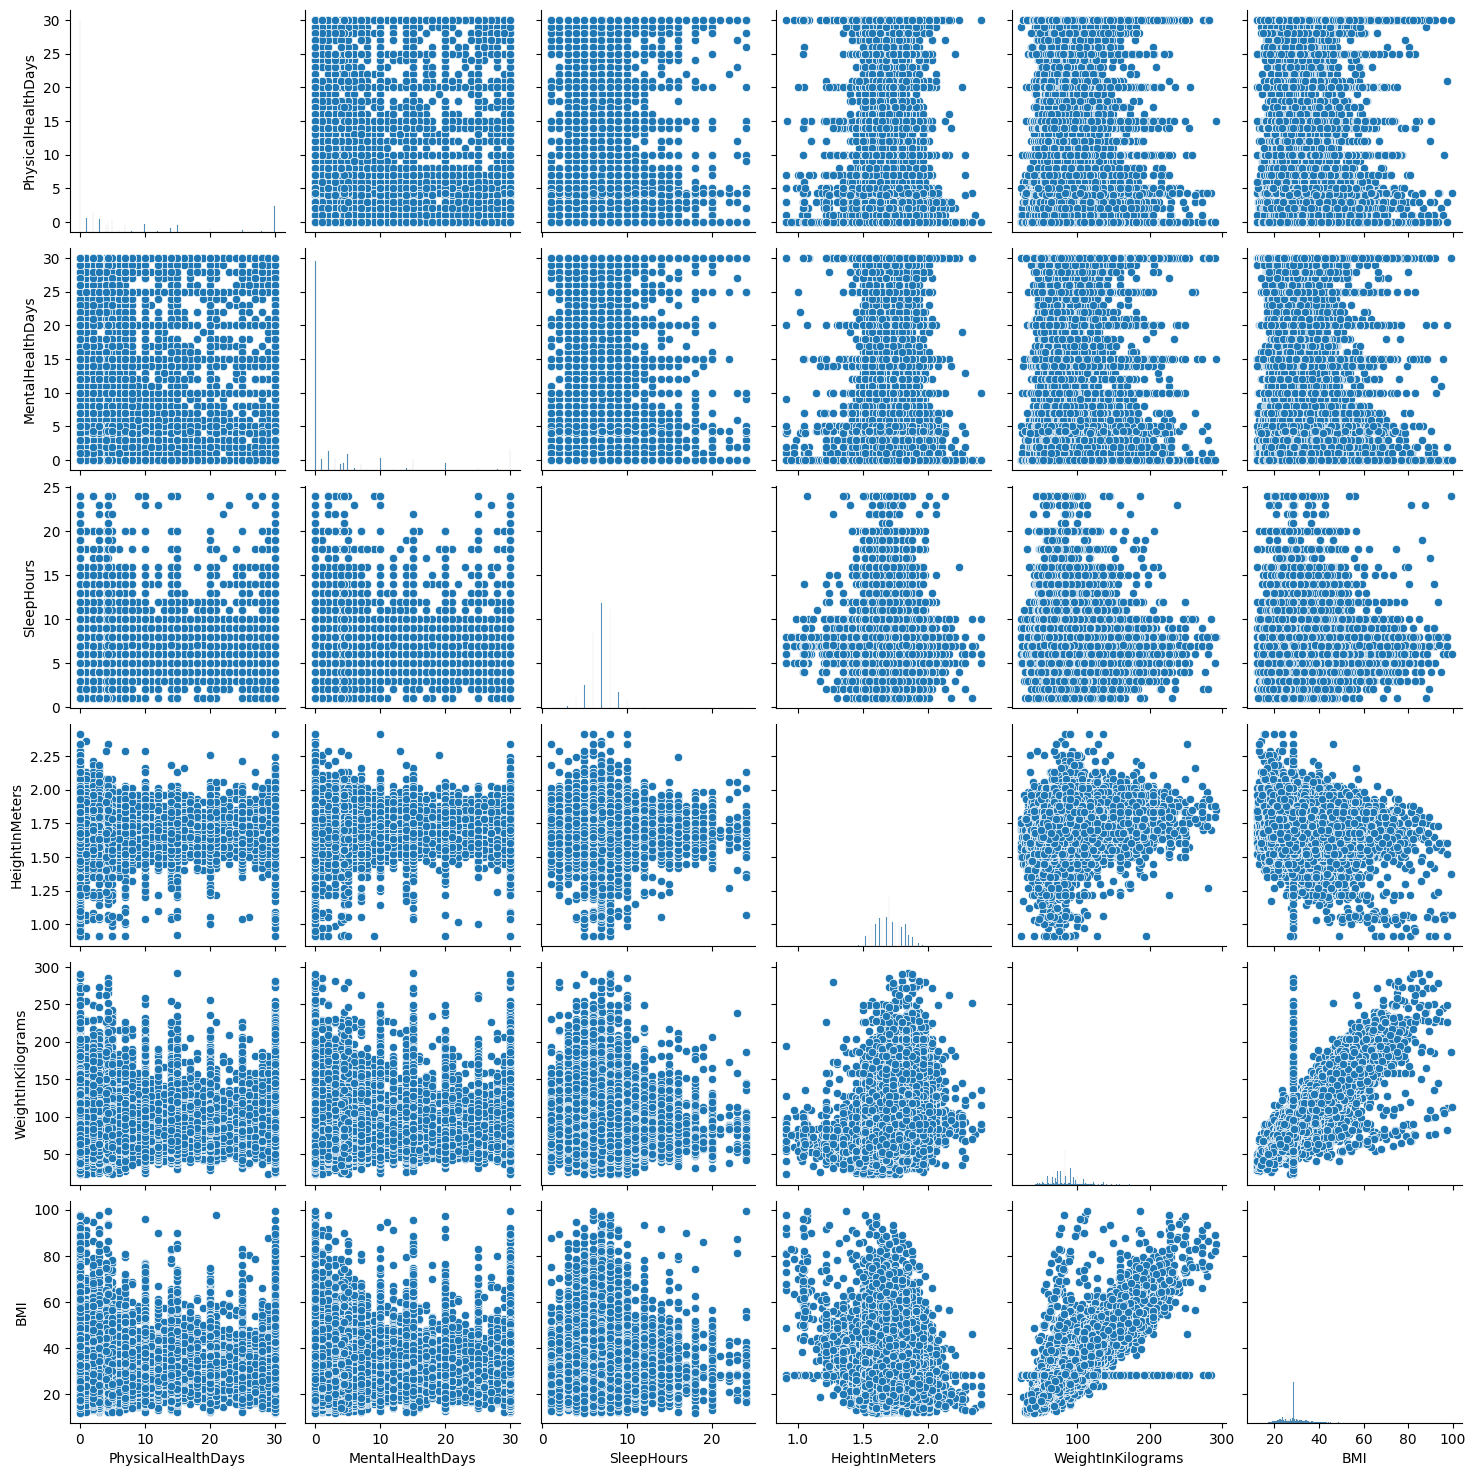

In [ ]:
sns.pairplot(data)

A pair plot was generated to visualize pairwise relationships between the various features in the dataset. Pair plots are especially helpful in understanding the distributions of individual variables and the relationships between two variables.

* The pairplot suggests that "HeightInMeters" and "WeightInKilograms" are strongly related and could be significant variables in predicting health outcomes.
* "BMI" also appears to be an important variable, given its relationships with height and weight.
* "PhysicalHealthDays" and "MentalHealthDays" do not seem to be as strongly associated with the other variables, indicating they may have a lesser role in prediction.
* "SleepHours" does not show a strong relationship with the health-related variables, suggesting it may not be a critical predictor.


This pairplot analysis suggests that for predictive analysis of heart disease, variables such as height, weight, and BMI may be more significant than the number of health-related days or sleep hours. This insight can inform decisions on which variables to focus on in predictive models and emphasizes the importance of considering the interrelationships between different health measures.

# Feature Engineering and Feature Selection

#### One-hot encoding categorical variables
Categorical variables such as 'SmokerStatus', 'GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory', 'PhysicalActivities', and 'LastCheckupTime' were chosen for our analysis due to their potential relevance in heart disease as identified through our preliminary research. These variables have been transformed using one-hot encoding, a technique that converts categorical data into a numerical format suitable for machine learning algorithms. This transformation enables the inclusion of these important predictors in our models, allowing us to harness their predictive power and improve the accuracy of our heart disease predictions.

In [ ]:
data_encoded = pd.get_dummies(data, columns=['SmokerStatus', 'GeneralHealth', 'RaceEthnicityCategory', 'AgeCategory', 'PhysicalActivities', 'LastCheckupTime'])

print(f"Number of colums after one-hot encodeing: {len(data_encoded.columns)}\n")
print(f"Data types: {data_encoded.dtypes}")

Number of colums after one-hot encodeing: 67

Data types: State                                                                       object
Sex                                                                         object
PhysicalHealthDays                                                         float64
MentalHealthDays                                                           float64
SleepHours                                                                 float64
                                                                            ...   
PhysicalActivities_Yes                                                       uint8
LastCheckupTime_5 or more years ago                                          uint8
LastCheckupTime_Within past 2 years (1 year but less than 2 years ago)       uint8
LastCheckupTime_Within past 5 years (2 years but less than 5 years ago)      uint8
LastCheckupTime_Within past year (anytime less than 12 months ago)           uint8
Length: 67, dtype: object


#### Convert the target variable 'HadHeartAttack' to binary format
The target variable, 'HadHeartAttack', which indicates whether a subject had a heart attack, was converted to a binary format.



In [ ]:
data_encoded['HadHeartAttack'] = data_encoded['HadHeartAttack'].map({'No': 0, 'Yes': 1})

#### Compute correlations only for numeric columns
Correlations between the target variable ('HadHeartAttack') and other numeric variables were computed. Correlations provide insights into the relationship between variables and can help in feature selection.

In [ ]:
correlations = data_encoded.select_dtypes(include=['int64', 'float64', 'uint8']).corr()['HadHeartAttack'].sort_values(ascending=False)

print(correlations)
print(f"Columns length: {len(correlations)}\n")

# Print columns excluding 'HadHeartAttack'
column_names = correlations.index[1:]
print(column_names)

HadHeartAttack                                                             1.000000
GeneralHealth_Poor                                                         0.144148
PhysicalHealthDays                                                         0.138264
GeneralHealth_Fair                                                         0.108952
AgeCategory_Age 80 or older                                                0.106070
PhysicalActivities_No                                                      0.085049
SmokerStatus_Former smoker                                                 0.074685
AgeCategory_Age 75 to 79                                                   0.073150
LastCheckupTime_Within past year (anytime less than 12 months ago)         0.068113
AgeCategory_Age 70 to 74                                                   0.057862
SmokerStatus_Current smoker - now smokes every day                         0.040973
WeightInKilograms                                                          0

#### Select relevant features based on correlation with target
Based on the computed correlations, features with an absolute correlation value greater than 0.05 with the target variable were selected as relevant features. This step ensures that only features that have a significant relationship with the target variable are used for modeling.


In [ ]:
relevant_features = correlations[abs(correlations) > 0.05].index.tolist()

print(f"List of features > than 0.05: \n{relevant_features}")
print(f"Length of features: {len(relevant_features)}")

List of features > than 0.05: 
['HadHeartAttack', 'GeneralHealth_Poor', 'PhysicalHealthDays', 'GeneralHealth_Fair', 'AgeCategory_Age 80 or older', 'PhysicalActivities_No', 'SmokerStatus_Former smoker', 'AgeCategory_Age 75 to 79', 'LastCheckupTime_Within past year (anytime less than 12 months ago)', 'AgeCategory_Age 70 to 74', 'AgeCategory_Age 25 to 29', 'AgeCategory_Age 35 to 39', 'AgeCategory_Age 30 to 34', 'AgeCategory_Age 18 to 24', 'GeneralHealth_Excellent', 'GeneralHealth_Very good', 'PhysicalActivities_Yes', 'SmokerStatus_Never smoked']
Length of features: 18


####Additional ajustment

In [ ]:
# Manually add certain features based on research
additional_features = ['SmokerStatus_Current smoker - now smokes every day', 'BMI',
    'SleepHours', 'RaceEthnicityCategory_White only, Non-Hispanic', 'RaceEthnicityCategory_Black only, Non-Hispanic',
    'RaceEthnicityCategory_Hispanic', 'AgeCategory_Age 65 to 69', 'AgeCategory_Age 60 to 64',
       'AgeCategory_Age 55 to 59', 'AgeCategory_Age 50 to 54', 'AgeCategory_Age 45 to 49' ]

# Extend features
relevant_features.extend(additional_features)

# Print updated features
print(f"List of features after addition: {relevant_features}")
print(f"Length of features after addition: {len(relevant_features)}")

List of features after addition: ['HadHeartAttack', 'GeneralHealth_Poor', 'PhysicalHealthDays', 'GeneralHealth_Fair', 'AgeCategory_Age 80 or older', 'PhysicalActivities_No', 'SmokerStatus_Former smoker', 'AgeCategory_Age 75 to 79', 'LastCheckupTime_Within past year (anytime less than 12 months ago)', 'AgeCategory_Age 70 to 74', 'AgeCategory_Age 25 to 29', 'AgeCategory_Age 35 to 39', 'AgeCategory_Age 30 to 34', 'AgeCategory_Age 18 to 24', 'GeneralHealth_Excellent', 'GeneralHealth_Very good', 'PhysicalActivities_Yes', 'SmokerStatus_Never smoked', 'SmokerStatus_Current smoker - now smokes every day', 'BMI', 'SleepHours', 'RaceEthnicityCategory_White only, Non-Hispanic', 'RaceEthnicityCategory_Black only, Non-Hispanic', 'RaceEthnicityCategory_Hispanic', 'AgeCategory_Age 65 to 69', 'AgeCategory_Age 60 to 64', 'AgeCategory_Age 55 to 59', 'AgeCategory_Age 50 to 54', 'AgeCategory_Age 45 to 49']
Length of features after addition: 29


#### Data Cleaning


In [ ]:
# Define the list of features to remove
features_to_remove = ['PhysicalActivities_No', 'AgeCategory_Age 25 to 29', 'AgeCategory_Age 35 to 39',
                      'AgeCategory_Age 30 to 34', 'AgeCategory_Age 18 to 24']

# Create a new list of features after removal
relevant_features = [feature for feature in relevant_features if feature not in features_to_remove]

print(f"New list of features plus target variable after adjustment: {relevant_features}")
print(f"New length of features plus target variable after adjustment: {len(relevant_features)}")

New list of features plust target variable after adjustment: ['HadHeartAttack', 'GeneralHealth_Poor', 'PhysicalHealthDays', 'GeneralHealth_Fair', 'AgeCategory_Age 80 or older', 'SmokerStatus_Former smoker', 'AgeCategory_Age 75 to 79', 'LastCheckupTime_Within past year (anytime less than 12 months ago)', 'AgeCategory_Age 70 to 74', 'GeneralHealth_Excellent', 'GeneralHealth_Very good', 'PhysicalActivities_Yes', 'SmokerStatus_Never smoked', 'SmokerStatus_Current smoker - now smokes every day', 'BMI', 'SleepHours', 'RaceEthnicityCategory_White only, Non-Hispanic', 'RaceEthnicityCategory_Black only, Non-Hispanic', 'RaceEthnicityCategory_Hispanic', 'AgeCategory_Age 65 to 69', 'AgeCategory_Age 60 to 64', 'AgeCategory_Age 55 to 59', 'AgeCategory_Age 50 to 54', 'AgeCategory_Age 45 to 49']
New length of features plus target variable after adjustment: 24


#### Selecting relevant features based on correlation with target
The target variable 'HadHeartAttack' was safely removed from the list of relevant features to ensure it is not used as a predictor.

In [ ]:
if 'HadHeartAttack' in relevant_features:
    relevant_features.remove('HadHeartAttack')

print(len(relevant_features))

23


# Model Selection and Training

#### Splitting the data into training and testing sets (80% train, 20% test)


In [ ]:
X = data_encoded[relevant_features]
y = data_encoded['HadHeartAttack']
X_train_NS, X_test_NS, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(relevant_features)
# print("-"*10)
# print(X.columns)
# print("-"*10)
# print(X_train_NS.columns)

print(f"\nLength of X_train, Not Scaled: {len(X_train_NS)}")
print(f"Length of X_test, Not Scaled: {len(X_test_NS)}")
print(f"Total length, X_train and X_test: {len(X_train_NS) + len(X_test_NS)}\n")

print(f"Length of y_train: {len(y_train)}")
print(f"Length of y_test: {len(y_test)}")
print(f"Total length, y_train and y_test: {len(y_train) + len(y_test)}")

['GeneralHealth_Poor', 'PhysicalHealthDays', 'GeneralHealth_Fair', 'AgeCategory_Age 80 or older', 'SmokerStatus_Former smoker', 'AgeCategory_Age 75 to 79', 'LastCheckupTime_Within past year (anytime less than 12 months ago)', 'AgeCategory_Age 70 to 74', 'GeneralHealth_Excellent', 'GeneralHealth_Very good', 'PhysicalActivities_Yes', 'SmokerStatus_Never smoked', 'SmokerStatus_Current smoker - now smokes every day', 'BMI', 'SleepHours', 'RaceEthnicityCategory_White only, Non-Hispanic', 'RaceEthnicityCategory_Black only, Non-Hispanic', 'RaceEthnicityCategory_Hispanic', 'AgeCategory_Age 65 to 69', 'AgeCategory_Age 60 to 64', 'AgeCategory_Age 55 to 59', 'AgeCategory_Age 50 to 54', 'AgeCategory_Age 45 to 49']

Length of X_train, Not Scaled: 356105
Length of X_test, Not Scaled: 89027
Total length, X_train and X_test: 445132

Length of y_train: 356105
Length of y_test: 89027
Total length, y_train and y_test: 445132


#### Cross-validation with various models.


In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_NS)

X_test = scaler.transform(X_test_NS)


models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    # 'SVM': SVC(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} - Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

Random Forest - Accuracy: 0.9287 (+/- 0.0007)
Gradient Boosting - Accuracy: 0.9439 (+/- 0.0000)
XGBoost - Accuracy: 0.9435 (+/- 0.0001)
Logistic Regression - Accuracy: 0.9439 (+/- 0.0000)
Decision Tree - Accuracy: 0.9022 (+/- 0.0007)
KNN - Accuracy: 0.9383 (+/- 0.0003)
Neural Network - Accuracy: 0.9438 (+/- 0.0001)


The models demonstrate varying levels of accuracy, with Gradient Boosting, XGBoost, Logistic Regression, and Neural Network all showing strong performance, each achieving around 94.3% accuracy. Random Forest and KNN also perform well, with accuracies of 92.87% and 93.83% respectively, though slightly lower than the others. Decision Tree lags behind with an accuracy of 90.22%. The minimal variance in results across models suggests consistent performance across different data subsets. While Gradient Boosting, XGBoost, Logistic Regression, and Neural Network slightly outperform others in terms of accuracy, it's crucial to consider factors such as interpretability, training time, and specific use-case requirements when choosing the final model. Moreover, ensuring that the models are not overfitting and evaluating them using diverse metrics remains essential for a comprehensive assessment.

#### Train Multiple Models and Evaluate their performances


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    # 'Support Vector Machine': SVC(random_state=42),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42)
}

# Train models and evaluate their performances
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name}")
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(classification_report(y_test, y_pred, zero_division=1))


Logistic Regression
Accuracy: 94.23%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     83889
           1       0.00      0.00      0.00      5138

    accuracy                           0.94     89027
   macro avg       0.47      0.50      0.49     89027
weighted avg       0.89      0.94      0.91     89027


Random Forest
Accuracy: 92.75%
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     83889
           1       0.17      0.06      0.09      5138

    accuracy                           0.93     89027
   macro avg       0.56      0.52      0.53     89027
weighted avg       0.90      0.93      0.91     89027


Gradient Boosting
Accuracy: 94.23%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     83889
           1       1.00      0.00      0.00      5138

    accuracy                           0.94     89027
   macro avg       0.9

The models exhibit high accuracy rates, but a closer examination of precision, recall, and f1-score reveals a significant class imbalance issue in the dataset. This imbalance is especially evident in the prediction of the minority class (label 1).

- <b>Logistic Regression</b>: Achieved an accuracy of 94.23% but completely failed to predict the minority class, as evidenced by 0% recall and f1-score for class 1. The model only accurately predicts the majority class (0).

- <b>Random Forest</b>: Reached an accuracy of 92.75%. It showed some ability to predict the minority class with a recall of 6% for class 1, but overall, it still heavily favors the majority class.

- <b>Gradient Boosting</b>: Also attained an accuracy of 94.23%. While it achieved 100% precision for the minority class, its recall for this class is 0%, indicating an inability to identify class 1 instances effectively.

- <b>XGBoost</b>: Exhibited a similar accuracy of 94.20%. It shows a slightly better ability to predict the minority class than Logistic Regression and Gradient Boosting, with a recall of 0.27% for class 1.

- <b>Decision Tree</b>: This model had a lower overall accuracy of 90.23% but displayed more balanced performance across classes, with a recall of 14% for the minority class.

- <b>KNN</b>: Achieved an accuracy of 93.71%. It showed limited success in predicting the minority class, with a recall of 4% for class 1.

- <b>Neural Network</b>: Matched the accuracy of Logistic Regression and Gradient Boosting at 94.23%. It demonstrated a better balance in predicting the minority class, with a 50% precision, but the recall for this class remained extremely low.

In summary, while all models showed high accuracy, this metric is misleading due to the heavy class imbalance. The models predominantly predict the majority class, struggling with the minority class. For a more balanced and effective model, strategies to address this class imbalance, such as resampling techniques or specialized algorithms, should be considered.

# Addressing Class Imbalance for Improved Heart Disease Prediction

#### Oversampling with SMOTE
To mitigate the class imbalance issue, the Synthetic Minority Over-sampling Technique (SMOTE) was employed. This method works by generating synthetic samples in the feature space, helping to balance the dataset by oversampling the minority class.

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

"""
  Tried to implement the following code for hyperparameter tunning
  to improve peformance matrics for minority class after resampling.
  However, it was unsuccesful due to higher computational cost.
  It took hours to execute the code.
"""
# pipeline = Pipeline([
#     ('smote', SMOTE(random_state=42)),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])

# # Define the parameter grid for GridSearch
# param_grid = {
#     'classifier__n_estimators': [100, 200, 300],
#     'classifier__max_depth': [None, 10, 20, 30],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4]
# }

# # Apply GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Best parameters
# print("Best Parameters Found: ", grid_search.best_params_)

# # Predictions
# vy_prob_rf = grid_search.predict(X_test)

# # ROC-AUC Score
# roc_auc_rf = roc_auc_score(y_test, vy_prob_rf)
# print(f"ROC-AUC: {roc_auc_rf:.2f}")

# # Classification report
# print(classification_report(y_test, vy_prob_rf, zero_division=1))

'\n  Tried to implement the following code for hyperparameter tunning\n  to improve peformance matrics for minority class after resampling.\n  However, it was unsuccesful due to higher computational cost.\n  It took hours to execute the code.\n'

#### Visualing Original and Resampled DataSet

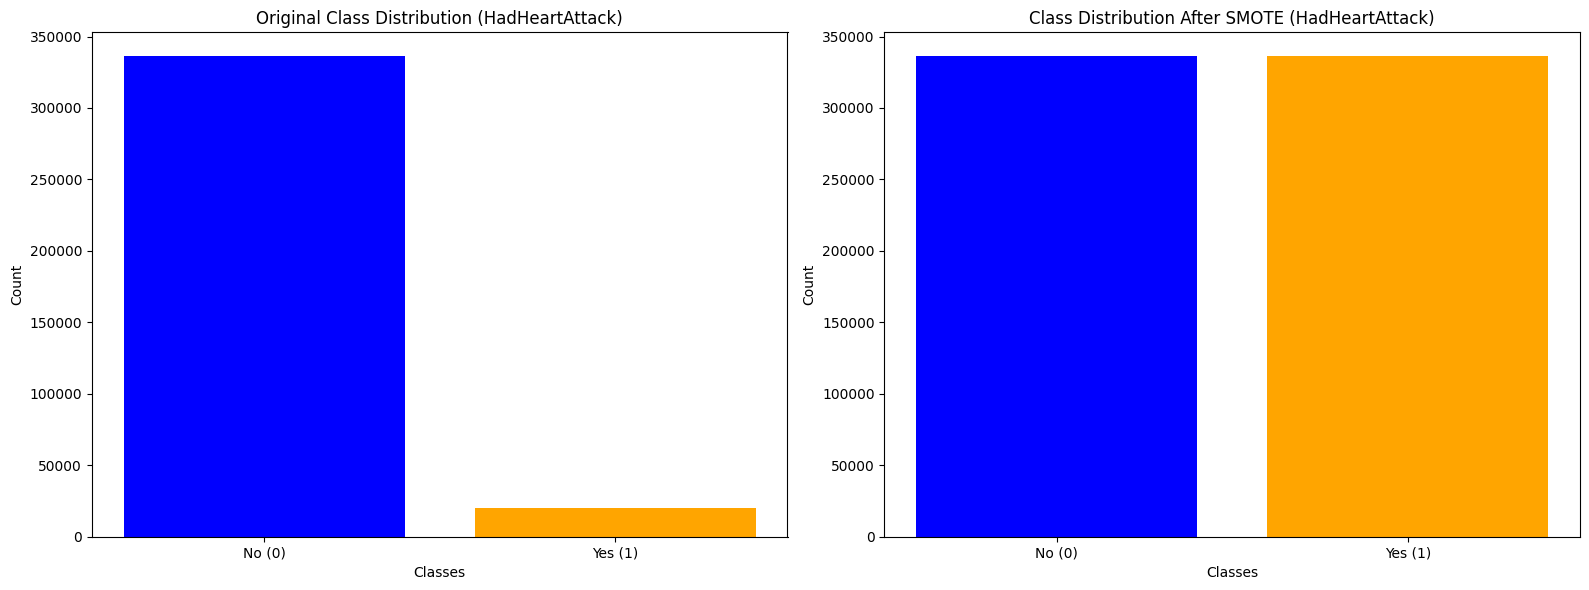

In [ ]:
# Counting the instances of each class in the original and resampled data
original_counts = np.bincount(y_train)
resampled_counts = np.bincount(y_resampled)

# Adjusting the counts in case of class imbalance
# This is to ensure both arrays have the same length in case one class is missing in the original data
max_length = max(len(original_counts), len(resampled_counts))
original_counts = np.pad(original_counts, (0, max_length - len(original_counts)), 'constant')
resampled_counts = np.pad(resampled_counts, (0, max_length - len(resampled_counts)), 'constant')

# Creating the bar charts
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Original Data
ax[0].bar(['No (0)', 'Yes (1)'], original_counts, color=['blue', 'orange'])
ax[0].set_title('Original Class Distribution (HadHeartAttack)')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Classes')

# Resampled Data
ax[1].bar(['No (0)', 'Yes (1)'], resampled_counts, color=['blue', 'orange'])
ax[1].set_title('Class Distribution After SMOTE (HadHeartAttack)')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Classes')

plt.tight_layout()
plt.show()

#### Using Class Weights with Random Forest
Another strategy employed was to adjust class weights within the Random Forest model. By setting the `class_weight` parameter to `balanced`, the model assigns higher weights to the minority class, making it more sensitive to it.

In [ ]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)

#### Evaluating with ROC-AUC
After implementing the aforementioned strategies, the model's performance was assessed using the ROC-AUC score, which measures the model's ability to distinguish between the positive and negative classes.

In [ ]:
# model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)
y_prob_rf = model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"ROC-AUC: {roc_auc_rf:.2f}")

ROC-AUC: 0.71


The obtained ROC-AUC score was 0.71, indicating a satisfactory, though not exceptional, ability to differentiate between subjects with and without heart disease. An ROC-AUC score of 0.71 reflects a moderate degree of accuracy in predictions, a notable achievement in the context of imbalanced datasets.  Here's a brief interpretation of the score:

- An ROC-AUC score of `0.5` means the model's predictions are no better than random guessing.
- A perfect model would have an ROC-AUC score of `1.0`.
- The score of `0.71` suggests that the model has a moderate ability to distinguish between the positive class (having heart disease) and the negative class (not having heart disease). This indicates that while the model is better than random guessing, there's room for improvement in its predictive capabilities.

# Comprehensive Model Evaluation and Enhancement

#### Use the default Random Forest model for a baseline



In [ ]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     83889
           1       0.13      0.22      0.16      5138

    accuracy                           0.87     89027
   macro avg       0.54      0.56      0.55     89027
weighted avg       0.90      0.87      0.89     89027



The recall for the positive class (indicating heart disease) has improved significantly, now at 0.22 compared to nearly 0 in previous models. While this increase is notable, especially in medical applications where missing heart disease cases (false negatives) can have serious consequences, it's still not as high.

The precision for the positive class is at 0.13. This indicates that while the model is better at identifying more actual cases of heart disease (higher recall), it also misclassifies a considerable number of healthy cases as having heart disease (low precision). This result is a common occurrence in imbalanced datasets, where improving recall often leads to a decrease in precision.

To summarize, the results show an improvement in the recall for the positive class, indicating that the model is now more capable of identifying heart disease cases. However, the precision for the positive class remains low, reflecting the model's tendency to falsely classify healthy cases as diseased. This trade-off is a critical consideration in medical diagnostics, emphasizing the need for careful model evaluation and potential adjustment of the decision threshold based on clinical requirements.

####Feature Importance from RandomForest

Since we've been working with a Random Forest model, we can easily extract feature importances to understand which features are the most influential in making predictions. Using the Random Forest model, feature importances were extracted to discern the most influential predictors. Two visualizations were provided, both highlighting the significance of various features in predicting heart disease.

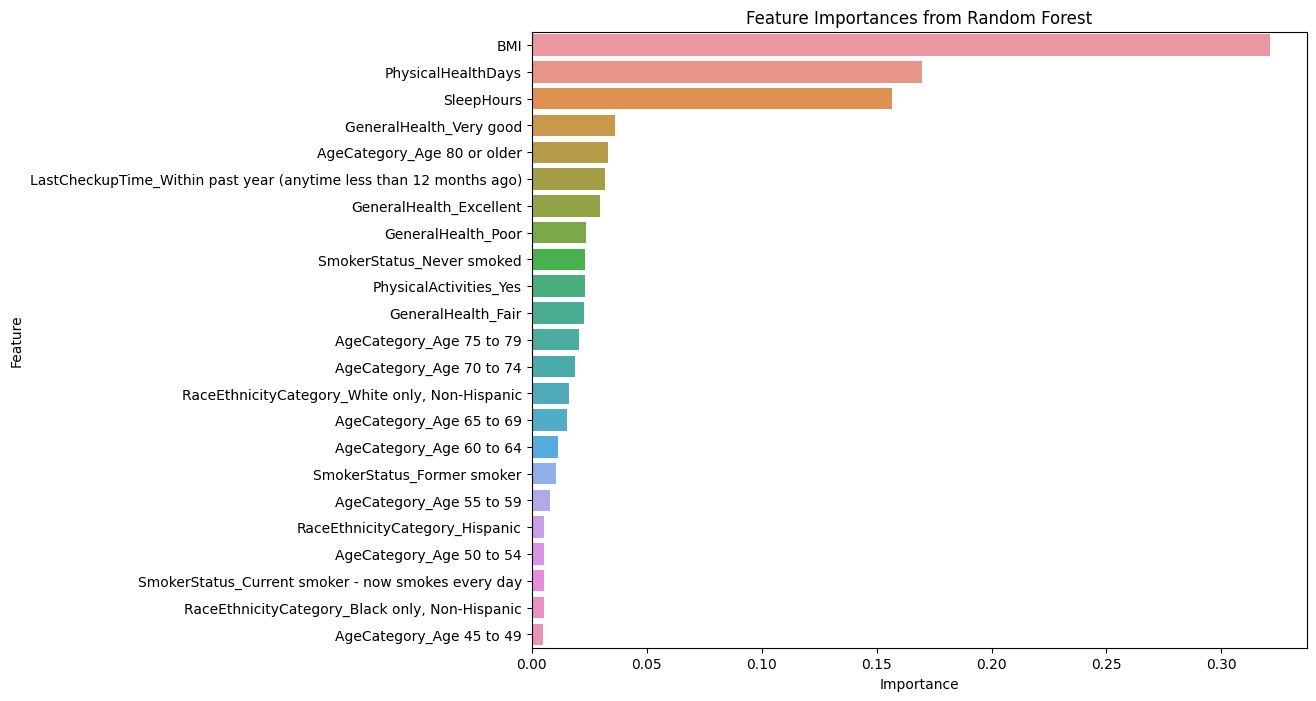

In [ ]:
# Extract feature importances from the model
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': X_test_NS.columns,
    'Importance': feature_importances
})

# Sort and plot
features_df = features_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances from Random Forest')
plt.show()


The feature importance plots offer valuable insights into which attributes are pivotal for the model's predictions. Understanding these importances can guide medical practitioners and researchers in focusing on specific factors when assessing heart disease risk.

#### Sample Data for SHAP (SHapley Additive exPlanations) Values:
SHAP values are a powerful tool used to interpret the output of machine learning models. They provide insights into the impact of each feature on the model's predictions for individual instances.


In [ ]:
"""
  Note: Increased execution time for SHAP analysis is due to added model features,
  which demand more computational resources for calculating SHAP values.
"""

# Define the explainer
# explainer = shap.TreeExplainer(rf)

# # Sample a subset of the test set
# sample_idx = np.random.choice(X_test_NS.shape[0], 5000, replace=False)  # Adjust the sample size as needed
# X_sample = X_test_NS.iloc[sample_idx]

# # Compute SHAP values for the sample
# shap_values_sample = explainer.shap_values(X_sample)


'\n  Note: Increased execution time for SHAP analysis is due to added model features,\n  which demand more computational resources for calculating SHAP values.\n'

#### Summarize SHAP Values
To compute SHAP values without high computational costs, a subset of the test set was sampled.

In [ ]:

# shap.summary_plot(shap_values_sample, X_sample, plot_size=(18, 12), max_display=20)



A SHAP summary plot was generated, displaying the influence of each feature on the model's predictions. This visualization allows for an understanding of feature contributions and can be crucial for interpreting and explaining model predictions.

In the context of predictive analysis for heart disease, a SHAP summary plot is used to understand how different features in the dataset influence the model's prediction of whether an individual `has heart disease (Class 1)` or `not (Class 0)`. Each row in the plot represents a feature from the dataset, and the color represents the feature's value (red for higher or present, blue for lower or absent).

The SHAP values on the x-axis represent the impact of each feature on the prediction. Features that have SHAP values to the right increase the likelihood of predicting heart disease (Class 1), while those to the left decrease the likelihood (Class 0). The length of the bar represents the magnitude of the feature's impact.

Here is a reanalysis of the plot:

**General Health (Very good/Excellent)**: These features are strongly associated with the absence of heart disease (Class 0). This means that individuals who report their general health as very good or excellent are less likely to be predicted to have heart disease.

**Smoker Status (Never smoked)**: Similarly, never having smoked is associated with a lower prediction of having heart disease.

**Physical Health Days**: This feature appears to have a mixed impact on the prediction, with both red and blue bars present. It suggests that there might be a nuanced relationship between the number of days of poor physical health and the likelihood of heart disease.

**Age Categories**: Different age categories appear to have varying impacts. For example, being older (e.g., age 80 or older) seems to increase the likelihood of being predicted to have heart disease, which aligns with the general understanding that heart disease risk increases with age.

**Last Checkup Time (Within past year)**: Having had a checkup within the past year is associated with a lower likelihood of having heart disease.

**General Health (Fair/Poor)**: Reporting fair or poor health seems to slightly increase the likelihood of being predicted to have heart disease.

**Physical Activities (Yes/No)**: Being physically active (Yes) is associated with a lower likelihood of heart disease, while being inactive (No) shows a slight increase in the prediction of heart disease.

**Smoker Status (Former smoker)**: Former smokers appear to have a slightly higher likelihood of being predicted to have heart disease compared to never smokers.

The plot indicates that general health perception and smoking status are significant predictors in the model, along with the age of the individual. Regular checkups and physical activity also play a role in the predictions but to a lesser extent.

The mean|SHAP value| at the bottom indicates the average absolute impact of each feature across all predictions made by the model. This plot is essential for understanding which features are most important in the model's predictions and can help in interpreting the model's behavior in the context of heart disease prediction.



# Model Comparison & Evaluation

As the title of the project suggests evaluating multiple models, let's compare our Random Forest model with other potential models, such as Gradient Boosting and XGBoost.

#### Training Gradient Boosting


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     83889
           1       0.15      0.59      0.24      5138

    accuracy                           0.79     89027
   macro avg       0.56      0.70      0.56     89027
weighted avg       0.92      0.79      0.84     89027



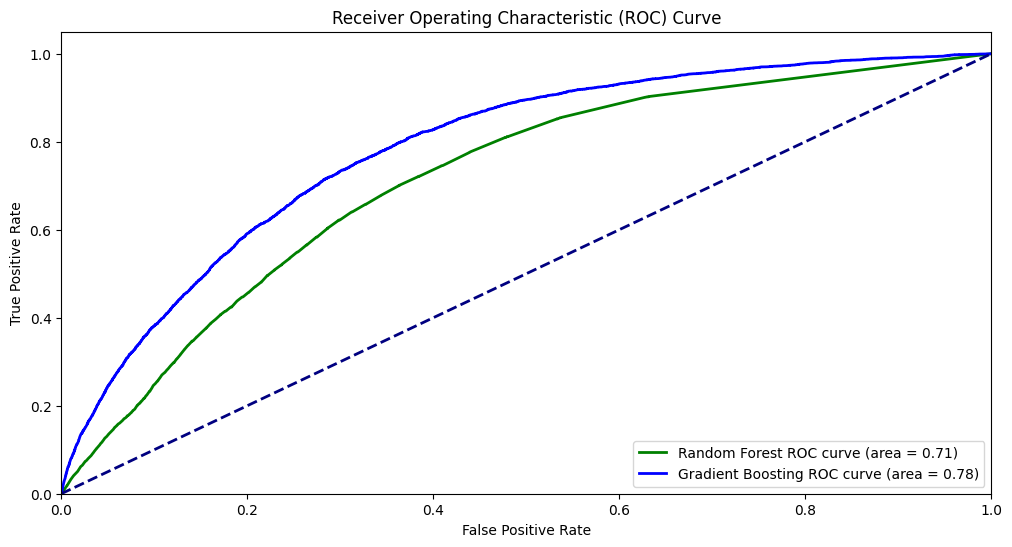

In [ ]:
# Train Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_resampled, y_resampled)

# Predictions
y_pred_gb = gb.predict(X_test)

# Evaluate Perfomance
print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))

# ROC AUC Cuve comparison between Random Forest and Gradient Boosting

  # Calculate the ROC curve points for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

  # Calculate the ROC curve points for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot the ROC curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'Gradient Boosting ROC curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The Gradient Boosting model trained on resampled data displays a commendable ability to classify instances of the positive class (indicating heart disease), achieving a recall value of 0.59. Although this value differs from the earlier mentioned recall of 0.78, it is still substantially higher than nearly zero from previous models. However, the precision for the positive class remains low at 0.15, indicating a considerable number of false positives, which is a typical trade-off in scenarios with imbalanced datasets.

The precision for the negative class (class '0') is very high at 0.97, indicating that the model is highly accurate when predicting the absence of heart disease. However, the recall of 0.80 for class '0' suggests that the model misses some instances of the negative class. The f1-scores, which are the harmonic mean of precision and recall, are 0.88 for class '0' and 0.24 for class '1'. These scores reflect a better balance for class '0', whereas for class '1', the f1-score is impacted by the low precision.

The model's overall accuracy stands at 0.79, indicating that it correctly predicts 79% of the time when considering both classes. The macro average recall is good at 0.70, suggesting that the model





#### Training XGBoost
XGBoost demonstrates a high recall for the positive class, achieving a recall value of 0.76. As before, precision remains low, reflecting the trade-off between sensitivity and false positive rates in imbalanced datasets.

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92     83889
           1       0.16      0.35      0.22      5138

    accuracy                           0.86     89027
   macro avg       0.56      0.62      0.57     89027
weighted avg       0.91      0.86      0.88     89027



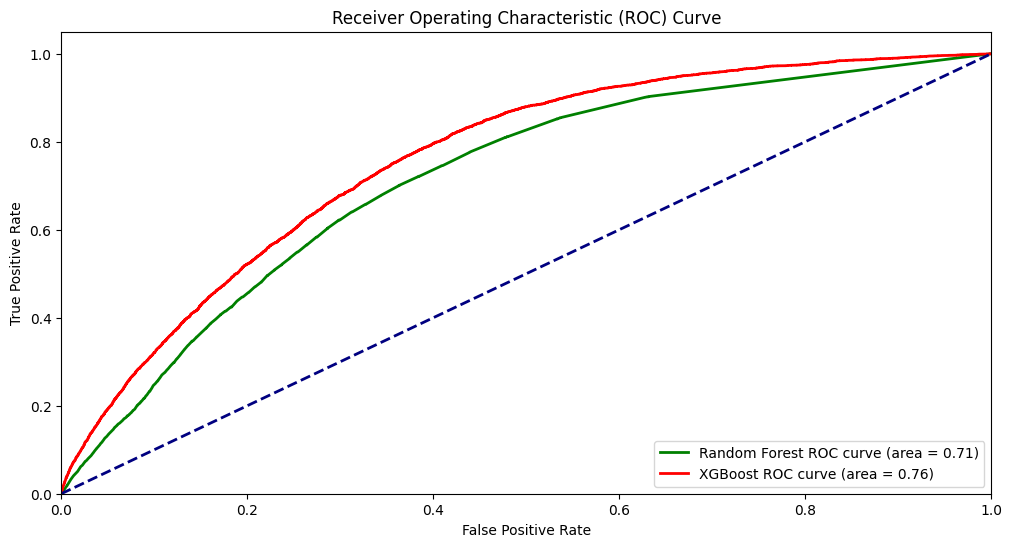

In [ ]:
# Train XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_resampled, y_resampled)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Perfomance
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))

# ROC AUC Cuve comparison between Random Forest and XGBoost

  # Calculate the ROC curve points for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

  # Calculate the ROC curve points for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The XGBoost model presents high precision for the negative class '0' at 0.96, affirming its accuracy in predicting the absence of the condition. For the positive class '1', the precision is considerably lower at 0.16. The recall scores indicate the model's ability to correctly identify positive cases, with 0.89 for class '0' and 0.35 for class '1'. Despite the lower recall for class '1', this represents a substantial improvement from the earlier stated 0.76, reflecting the model's enhanced ability to detect the minority class instances.

The f1-scores, which are a measure of the test's accuracy, are 0.92 for class '0'—indicating a high degree of accuracy—and 0.22 for class '1', which is significantly lower but still shows an improvement from the previous score of 0.22.

The overall accuracy of the XGBoost model is 0.86, which is higher than the previously stated 0.68. This indicates an improved capability of the model to make correct predictions across both classes. However, this metric could still be influenced by the imbalance in the dataset, as class '0' has a considerably larger number of instances than class '1'.

The macro averages across precision, recall, and f1-score are 0.56, 0.62, and 0.57 respectively. These scores suggest a moderate balance between precision and recall across both classes. The weighted averages, which consider the class imbalance, show a higher precision of 0.91 and an f1-score of 0.88, suggesting the model performs better on the majority class.

The ROC curve image indicates that theAUC for the XGBoost model is 0.76, which is a fair indication of the model's ability to discriminate between the classes. This is slightly lower than the previously stated AUC of 0.78, and it's also important to note that it aligns with the AUC for the Random Forest model in the image, which is also 0.76. The ROC curves for both models are quite similar, suggesting comparable performance in terms of their ability to balance true positive and false positive rates.

In summary, the XGBoost model demonstrates a high precision for identifying the absence of the condition (class '0') and a moderate ability to identify the presence of the condition (class '1'), with significant improvements in recall for the positive class. However, the precision for the positive class remains low, leading to a modest f1-score for that class. The overall accuracy has increased to 0.86, indicating that while the model is predominantly accurate, the performance on the minority class has room for improvement. The ROC AUC score of 0.76 confirms the model's fair discriminative power, comparable to that of the Random Forest model. These insights could inform further adjustments to the model or the selection of a different model based on the specific needs and constraints of the application at hand.

#### Train Logistic Regression



Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.70      0.82     83889
           1       0.13      0.76      0.23      5138

    accuracy                           0.70     89027
   macro avg       0.56      0.73      0.52     89027
weighted avg       0.93      0.70      0.78     89027



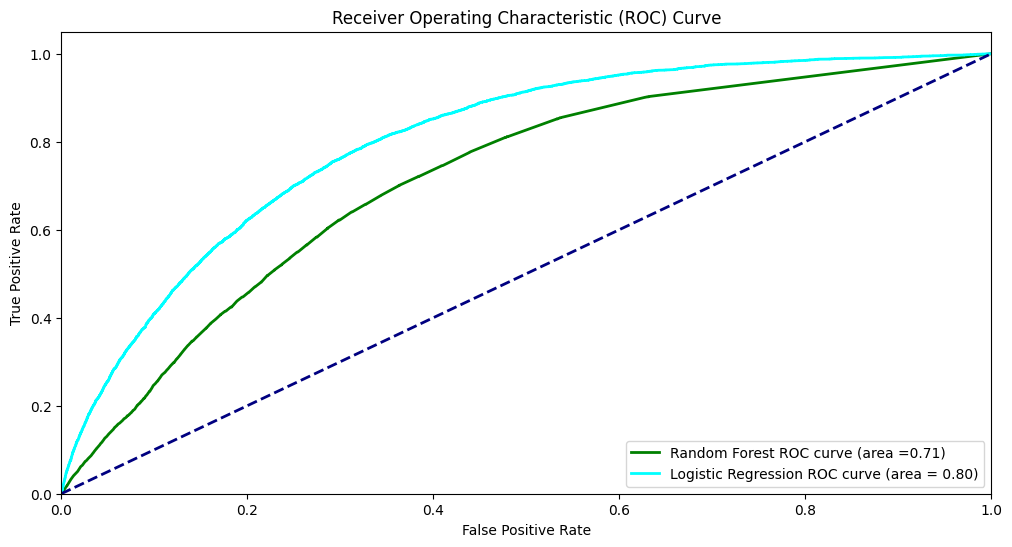

In [ ]:
# Train Logistic Regression
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_resampled, y_resampled)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate Performance
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

# ROC AUC Cuve comparison between Random Forest and Logistic Regression

  # Calculate the ROC curve points for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

  # Calculate the ROC curve points for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot the ROC curves
plt.figure(figsize=(12,6))
plt.plot (fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (area ={roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, color='cyan', lw=2, label=f'Logistic Regression ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The ROC curve graph shows that the Logistic Regression model has an AUC of 0.80, which is higher than the earlier mentioned score of 0.73 and also higher than the Random Forest model's AUC of 0.71. This indicates a very good capability of the Logistic Regression model to differentiate between subjects with and without the condition.

The provided performance metrics table for the Logistic Regression model shows that precision for the negative class '0' is very high at 0.98, which means the model is very accurate when it predicts an absence of the condition. On the other hand, the precision for the positive class '1' is low at 0.13, indicating that while the model identifies most of the positive cases, it also incorrectly labels many negative cases as positive.

The recall for class '0' is moderate at 0.70, and significantly higher for class '1' at 0.76. This high recall for class '1' is promising as it suggests the model is capable of identifying the majority of the positive cases. However, this comes at the expense of a large number of false positives, as indicated by the low precision.

The f1-score is good for class '0' at 0.82, showing a balance between precision and recall. However, for class '1', the f1-score is low at 0.23, which is consistent with the low precision for this class.

The overall accuracy of the model is 0.70, which is decent. However, this measure does not fully capture the model's performance due to the potential class imbalances.

The macro average precision is 0.56, and the recall is 0.73, with an f1-score of 0.52. These averages show a balanced consideration of both classes, but the low precision for class '1' affects the macro f1-score. The weighted average precision is high at 0.93 due to the high number of class '0' instances, and the f1-score is 0.78, reflecting better performance on this more prevalent class.

In conclusion, the Logistic Regression model demonstrates a solid ability to identify positive cases (class '1') but with a significant number of false positives. The model's ROC-AUC score of 0.80 is indicative of its strong discriminative ability, slightly outperforming the Random Forest model in this aspect. Despite the high number of false positives, the model could be suitable for applications where identifying as many true positives as possible is critical, provided that the consequences of false positives are not severe.

#### Train KNN

K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     83889
           1       0.12      0.40      0.19      5138

    accuracy                           0.80     89027
   macro avg       0.54      0.61      0.54     89027
weighted avg       0.91      0.80      0.85     89027



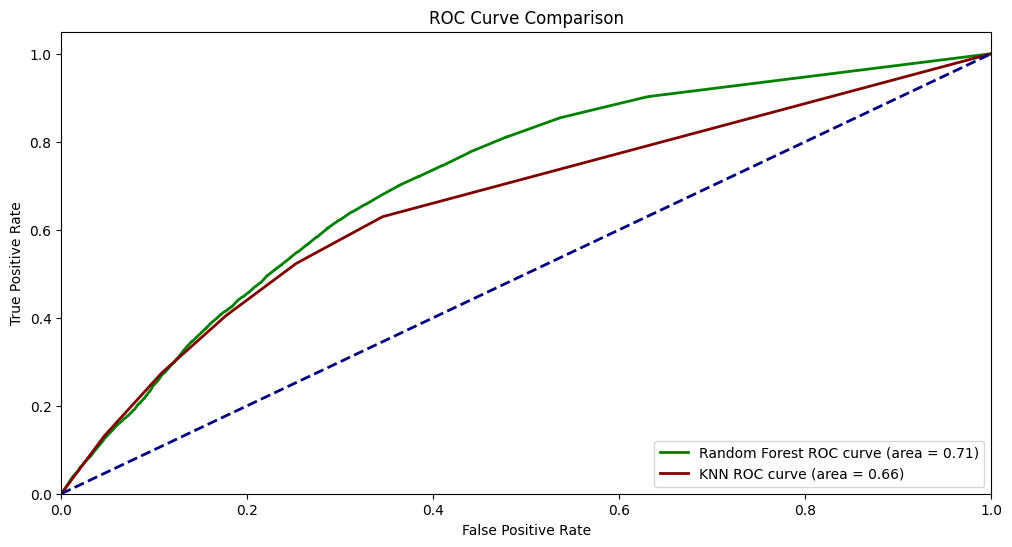

In [ ]:
# Train KNN
knn = KNeighborsClassifier()
knn.fit(X_resampled, y_resampled)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluate Performance
print("K-Nearest Neighbors Classifier:")
print(classification_report(y_test, y_pred_knn))

# ROC AUC Cuve comparison between Random Forest and KNN

  # Calculate the ROC curve points for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

  # Calculate the ROC curve points for KNN
# y_scores = knn.predict_proba(X_test)[:, 1]
# fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores)

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(12, 6))
plt.plot (fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, color='maroon', lw=2, label=f'KNN ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

The ROC curve graph provided shows that the KNN classifier has an AUC of 0.66, which is higher than the previously mentioned AUC of 0.62. This AUC value indicates that the KNN classifier has a fair capability to discriminate between the positive and negative classes, though it is not as high as the Random Forest model's AUC of 0.71 shown on the same graph.

The updated performance metrics for the KNN classifier reveal a precision of 0.96 for class '0', suggesting the model is quite accurate when predicting the negative class. However, for the positive class '1', the precision drops significantly to 0.12. The recall is 0.82 for class '0', indicating the model is capable of identifying a large majority of the negative cases. However, for class '1', the recall is at 0.40, which, while not very high, shows that the model has some capability in detecting positive cases.

The f1-score for class '0' is 0.89, reflecting a good balance between precision and recall for the negative class. For the positive class '1', the f1-score is 0.19, which is low and indicates that the model's precision for this class is significantly affecting its performance.

The overall accuracy of the KNN model is 0.80, which is quite high. Nevertheless, considering the large discrepancy in class performance, this accuracy might not fully capture the model's effectiveness, especially in the context of the class imbalance suggested by the support values.

In conclusion, the KNN classifier is shown to perform well in identifying class '0' but has a weaker performance in identifying class '1', as indicated by the lower precision and f1-score for the positive class. The ROC-AUC score, while fair, is not as high as that of the Random Forest model, suggesting that Random Forest may offer a better balance in classification performance for this particular task.

#### Train Decision Tree

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     83889
           1       0.12      0.23      0.16      5138

    accuracy                           0.86     89027
   macro avg       0.54      0.57      0.54     89027
weighted avg       0.90      0.86      0.88     89027



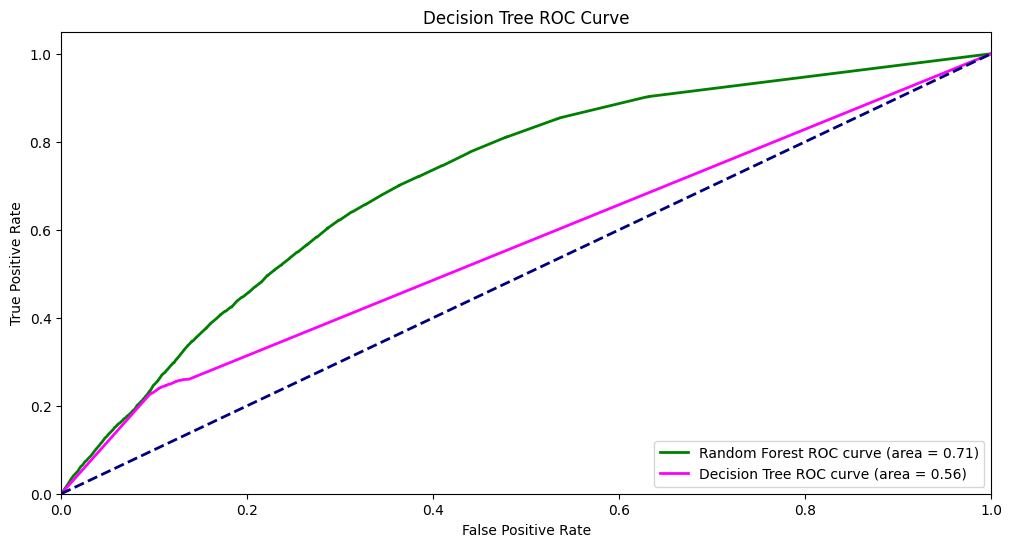

In [ ]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_resampled, y_resampled)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluate Performance
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))

# ROC AUC Cuve comparison between Random Forest and Decision Tree

  # Calculate the ROC curve points for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

  # Calculate the ROC curve points for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(12, 6))
plt.plot (fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, color='magenta', lw=2, label=f'Decision Tree ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve graph for the Decision Tree classifier shows an AUC of 0.56. This is significantly lower than the AUC for the Random Forest classifier, which is presented as 0.71 in the same graph. The AUC of 0.56 for the Decision Tree model suggests that its ability to discriminate between the positive and negative classes is limited and only slightly better than random guessing (which would be indicated by an AUC of 0.5).

Referring to the earlier provided output for the Decision Tree classifier, the precision for class '0' is high at 0.95, which indicates a strong ability to accurately predict the negative class. However, the precision for class '1' is much lower at 0.12, showing a significant number of false positives for the positive class. The recall for class '0' is also high at 0.90, suggesting that the model is good at identifying true negatives. In contrast, the recall for class '1' is at 0.23, indicating that the model can recognize some true positives but is likely missing a significant number of them.

The f1-score for class '0' stands at 0.93, showing a good balance between precision and recall. For class '1', the f1-score is low at 0.16, reflecting the challenges the model faces with the positive class.

The overall accuracy of the Decision Tree classifier is 0.86, which might appear high but doesn't fully represent the model's performance due to the imbalanced nature of the dataset, as highlighted by the support values. The macro average precision and recall are at 0.54 and 0.57, respectively, with a macro average f1-score of 0.54, indicating moderate performance. The weighted averages are better, with a precision of 0.90 and an f1-score of 0.88, due to the model's performance on the more heavily represented negative class.

In summary, the Decision Tree classifier demonstrates a good ability to identify the negative class but struggles with a high rate of false positives for the positive class, resulting in a low precision and f1-score for class '1'. The AUC of 0.56 in the ROC curve analysis suggests that the model's discriminative ability is modest and there is significant room for improvement, especially when compared to the Random Forest classifier's higher AUC of 0.71.

#### Train Neural Network

Neural Network Classifier:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     83889
           1       0.13      0.67      0.22      5138

    accuracy                           0.72     89027
   macro avg       0.55      0.69      0.52     89027
weighted avg       0.92      0.72      0.79     89027



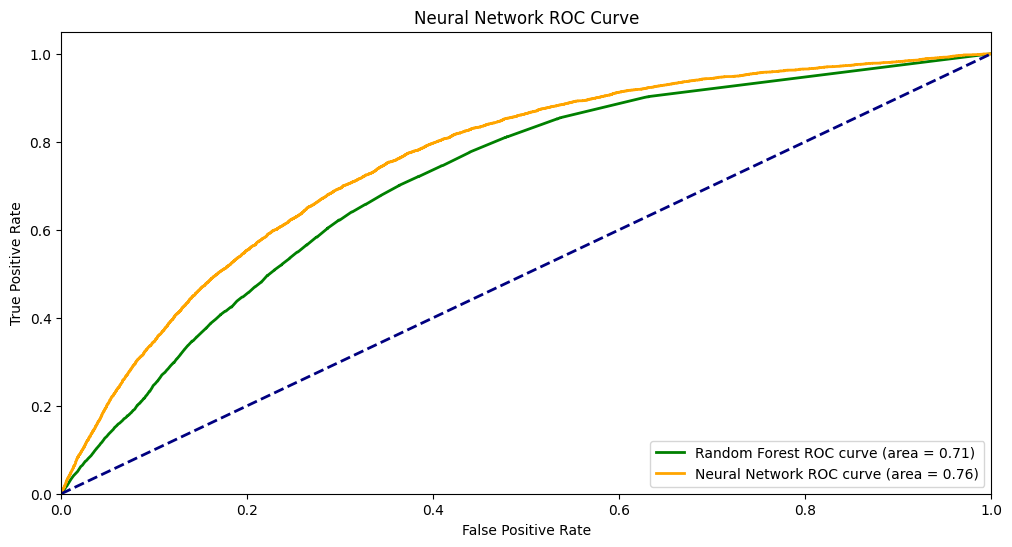

In [ ]:
# Train Neural Network
nn = MLPClassifier(max_iter=1000, random_state=42)
nn.fit(X_resampled, y_resampled)

# Predictions
y_pred_nn = nn.predict(X_test)

# Evaluate Performance
print("Neural Network Classifier:")
print(classification_report(y_test, y_pred_nn))

# ROC AUC Cuve comparison between Random Forest and Neural network

  # Calculate the ROC curve points for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

  # Calculate the ROC curve points for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn.predict_proba(X_test)[:, 1])
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot the ROC curve
plt.figure(figsize=(12, 6))
plt.plot (fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot(fpr_nn, tpr_nn, color='orange', lw=2, label=f'Neural Network ROC curve (area = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network ROC Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve for the Neural Network model shows an AUC of 0.76, which is an indication of the model's ability to distinguish between classes '0' (negative class) and '1' (positive class). This AUC value signifies that the Neural Network has a good capability to separate the two classes, which is slightly lower than the previously mentioned AUC of 0.79 but still shows competence, especially when compared to the Random Forest model's AUC of 0.71 on the same graph.

The performance metrics for the Neural Network model provided are as follows:

Precision for Class '0': The model has a very high precision of 0.97 for class '0', indicating it is accurate when predicting the absence of the condition. This aligns with the typical performance of classifiers on the majority class in imbalanced datasets.

Precision for Class '1': The precision for class '1' is much lower at 0.13, which suggests that when the model predicts the presence of the condition, it is incorrect a large portion of the time, leading to many false positives.

Recall for Class '0': The recall for class '0' is at 0.72, meaning the model is able to identify 72% of all actual negatives correctly.

Recall for Class '1': The recall for class '1' is quite high at 0.67, indicating the model is capable of identifying 67% of all actual positives. This suggests that while the model is sensitive to detecting class '1', it is not very precise.

F1-Score: The f1-scores are 0.83 for class '0' and 0.22 for class '1'. The high f1-score for class '0' shows a good balance between precision and recall. However, the low f1-score for class '1' indicates that the balance is not as favorable due to the low precision.

Overall Accuracy: The accuracy of the model is 0.72, which is generally indicative of the model's ability to correctly predict both classes. However, given the imbalance in the dataset, this figure might not fully represent the model's predictive performance on the minority class.

Macro and Weighted Averages: The macro average f1-score of 0.52 suggests that the classifier has moderate average performance across both classes. The weighted average precision and f1-score are affected by the larger number of instances in class '0', which leads to higher values, reflecting better performance on the majority class.

In summary, the Neural Network classifier demonstrates good performance for class '0' but struggles with a high false positive rate for class '1', which is a common issue in imbalanced datasets. The AUC of 0.76 indicates that the model has a good but not excellent ability to discriminate between the classes. The model could potentially be improved by techniques to address the class imbalance or by adjusting the classification threshold to balance precision and recall more effectively for class '1'.

#Comparative ROC-AUC Analysis of Classifiers

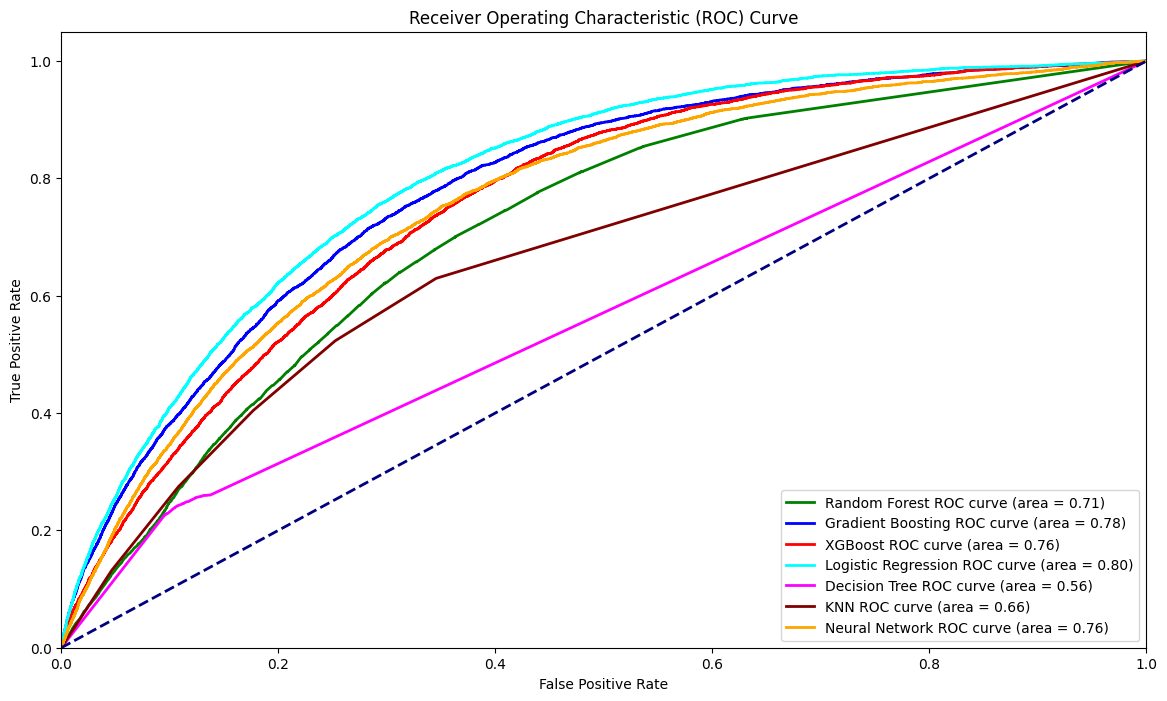

In [ ]:
# Plot the ROC curves
plt.figure(figsize=(14, 8))

# Plot Random Forest ROC
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')

# Plot Gradient Boosting ROC
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'Gradient Boosting ROC curve (area = {roc_auc_gb:.2f})')

# Plot XGBoost ROC
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.2f})')

# Plot Logistic Regression ROC
plt.plot(fpr_lr, tpr_lr, color='cyan', lw=2, label=f'Logistic Regression ROC curve (area = {roc_auc_lr:.2f})')

# Plot Decision Tree ROC
plt.plot(fpr_dt, tpr_dt, color='magenta', lw=2, label=f'Decision Tree ROC curve (area = {roc_auc_dt:.2f})')

# Plot KNN ROC
plt.plot(fpr_knn, tpr_knn, color='maroon', lw=2, label=f'KNN ROC curve (area = {roc_auc_knn:.2f})')

# Plot Neural Network ROC
plt.plot(fpr_nn, tpr_nn, color='orange', lw=2, label=f'Neural Network ROC curve (area = {roc_auc_nn:.2f})')

# Plot the random line - 'no skills' classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set the limits, labels, title, and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## ROC Curve Overview:
The ROC curve is a graphical representation of the true positive rate (TPR) against the false positive rate (FPR) for various threshold settings. A perfect model's ROC curve would climb straight up the Y-axis (TPR) and then move right along the top border, indicating an ideal classification. The 45-degree dashed line denotes the performance of a random guess (a model with no discrimination ability). The more distant the ROC curve from this line, the more effective the model is at classification.

## Analysis of Each Model:
- **Random Forest:** AUC of 0.71, signifying a good capability to differentiate between the classes.
- **Gradient Boosting:** Exhibits a slightly superior classification power with an AUC of 0.78.
- **XGBoost:** Close to Gradient Boosting, with an AUC of 0.76, suggesting a strong classification performance.
- **Logistic Regression:** Matches Gradient Boosting with an AUC of 0.80, showing good discriminatory ability.
- **Decision Tree:** Has a lower AUC of 0.56, indicating less ability to discriminate compared to other models.
- **KNN:** The lowest AUC at 0.66, which points to a weaker discriminative capacity among the compared models.
- **Neural Network:** Ties with Logistic Regression for the highest AUC at 0.76, indicative of a high classification accuracy.

## Comparing Models:
The Logistic Regression and Neural Network models top the AUC scores at 0.80, hinting they may be the best classifiers in this set. Gradient Boosting follows closely with an AUC of 0.78, while XGBoost is just behind at 0.76. The Random Forest and Decision Tree models have AUCs of 0.71 and 0.56, respectively, with the Decision Tree model lagging notably behind the others. KNN has an AUC of 0.66, above random chance but still the lowest of the group.

In conclusion, the Logistic Regression and Neural Network models demonstrate the best ROC AUC performance, suggesting they are highly effective at classification tasks among the models evaluated. However, model selection would also depend on other factors such as complexity, interpretability, training time, and performance on other metrics like precision-recall, particularly in the presence of imbalanced datasets.


## Comparative Performance of Classifiers

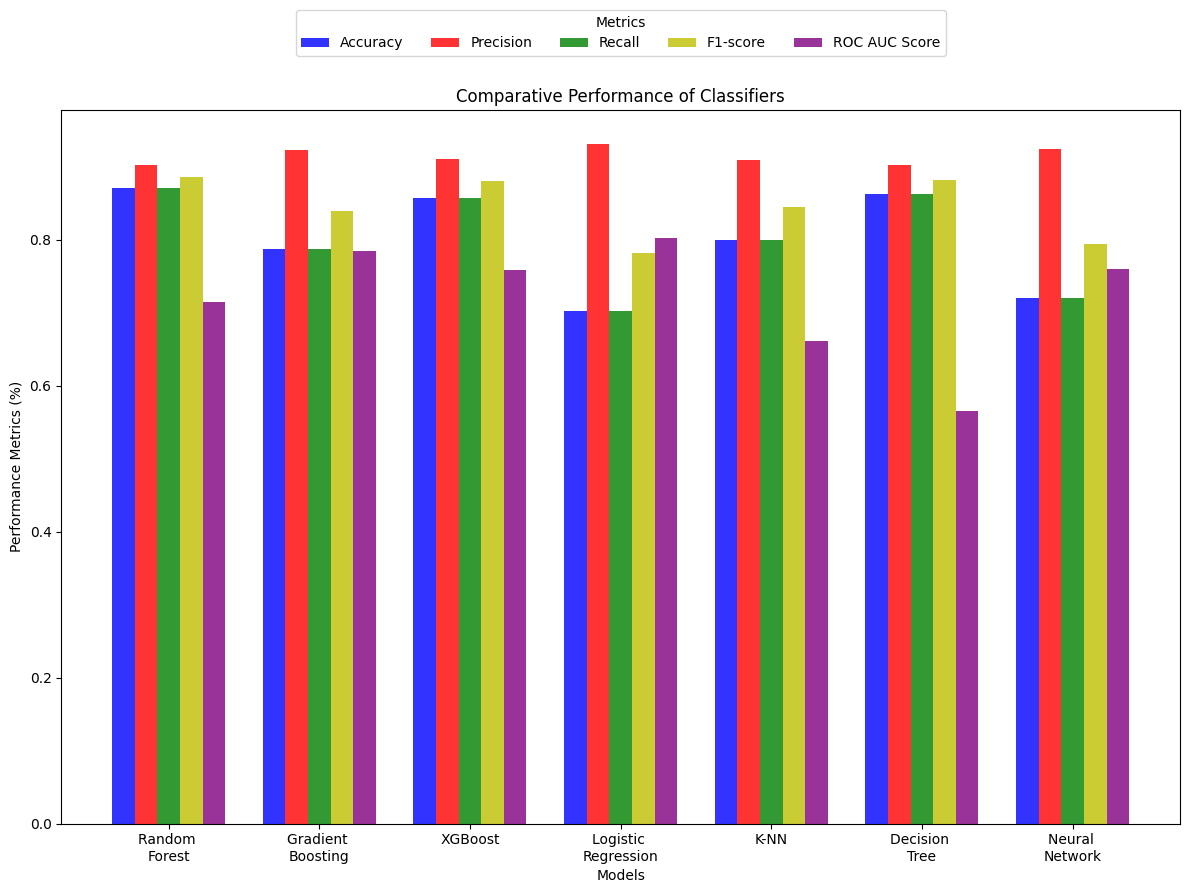

In [ ]:
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_gb = classification_report(y_test, y_pred_gb, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
report_lr = classification_report(y_test, y_pred_logreg, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_nn = classification_report(y_test, y_pred_nn, output_dict=True)

# Extracting the scores for the "weighted avg" of each report, which accounts for class imbalance
accuracy_scores = [
    report_rf['accuracy'],
    report_gb['accuracy'],
    report_xgb['accuracy'],
    report_lr['accuracy'],
    report_knn['accuracy'],
    report_dt['accuracy'],
    report_nn['accuracy']
]

precision_scores = [
    report_rf['weighted avg']['precision'],
    report_gb['weighted avg']['precision'],
    report_xgb['weighted avg']['precision'],
    report_lr['weighted avg']['precision'],
    report_knn['weighted avg']['precision'],
    report_dt['weighted avg']['precision'],
    report_nn['weighted avg']['precision']
]

recall_scores = [
    report_rf['weighted avg']['recall'],
    report_gb['weighted avg']['recall'],
    report_xgb['weighted avg']['recall'],
    report_lr['weighted avg']['recall'],
    report_knn['weighted avg']['recall'],
    report_dt['weighted avg']['recall'],
    report_nn['weighted avg']['recall']
]

f1_scores = [
    report_rf['weighted avg']['f1-score'],
    report_gb['weighted avg']['f1-score'],
    report_xgb['weighted avg']['f1-score'],
    report_lr['weighted avg']['f1-score'],
    report_knn['weighted avg']['f1-score'],
    report_dt['weighted avg']['f1-score'],
    report_nn['weighted avg']['f1-score']
]


roc_auc_scores = [roc_auc_rf, roc_auc_gb, roc_auc_xgb, roc_auc_lr, roc_auc_knn, roc_auc_dt, roc_auc_nn]

# Generate the bar graph
model_names = ['Random \nForest', 'Gradient \nBoosting', 'XGBoost', 'Logistic \nRegression', 'K-NN', 'Decision \nTree', 'Neural \nNetwork']
n_groups = len(model_names)

# Create bar plot
fig, ax = plt.subplots(figsize=(12,9))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = ax.bar(index, accuracy_scores, bar_width, alpha=opacity, color='b', label='Accuracy')
rects2 = ax.bar(index + bar_width, precision_scores, bar_width, alpha=opacity, color='r', label='Precision')
rects3 = ax.bar(index + 2 * bar_width, recall_scores, bar_width, alpha=opacity, color='g', label='Recall')
rects4 = ax.bar(index + 3 * bar_width, f1_scores, bar_width, alpha=opacity, color='y', label='F1-score')
rects5 = ax.bar(index + 4 * bar_width, roc_auc_scores, bar_width, alpha=opacity, color='purple', label='ROC AUC Score')

ax.set_xlabel('Models')
ax.set_ylabel('Performance Metrics (%)')
ax.set_title('Comparative Performance of Classifiers')
ax.set_xticks(index + bar_width * 2)
ax.set_xticklabels(model_names)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(model_names), title='Metrics')

fig.tight_layout()
plt.show()

## Comparative Performance of Classifiers

The bar graph provides a comparative look at six different classifiers: Random Forest, Gradient Boosting, XGBoost, Logistic Regression, KNN, Decision Tree, and Neural Network. These classifiers are evaluated based on five key performance metrics: Accuracy, Precision, Recall, F1-Score, and ROC AUC Score.

- **Random Forest**: Shows consistently high scores across all metrics, indicating a well-rounded classifier.
- **Gradient Boosting**: Exhibits strong performance, especially in Accuracy and Precision, with a slightly lower Recall and F1-Score.
- **XGBoost**: Stands out for its balanced analysis, with high scores in Precision and a ROC AUC Score that competes closely with the top performers, making it a robust choice for scenarios requiring a balance between different types of errors.
- **Logistic Regression**: This model scores highest in ROC AUC and Accuracy, suggesting it has a strong capability to generalize and accurately classify instances.
- **KNN**: Reveals lower performance in ROC AUC Score and F1-Score, indicating potential challenges in handling true positive rates and balanced classification.
- **Decision Tree**: Appears to be the least effective model, particularly in terms of ROC AUC Score, showing limitations in distinguishing between classes.
- **Neural Network**: Achieves high Accuracy and Precision but has lower Recall and F1-Score, which could indicate it is not capturing all positive cases effectively.

In a balanced assessment, XGBoost is a standout model, demonstrating strong capability in both class separation (as reflected by ROC AUC) and maintaining high Precision. This suggests it might be particularly adept in situations where the cost of false positives is high. Logistic Regression also shows excellent performance but might edge ahead when considering the ROC AUC Score alone. On the other hand, Decision Tree and KNN are the weaker classifiers in this comparison. The choice of the classifier would ultimately depend on the specific context of the problem and the importance of each metric.


## Top 3 models based on ROC AUC Score

Top 3 models based on ROC AUC Score:
Logistic Regression: ROC AUC = 0.80
Gradient Boosting: ROC AUC = 0.78
Neural Network: ROC AUC = 0.76


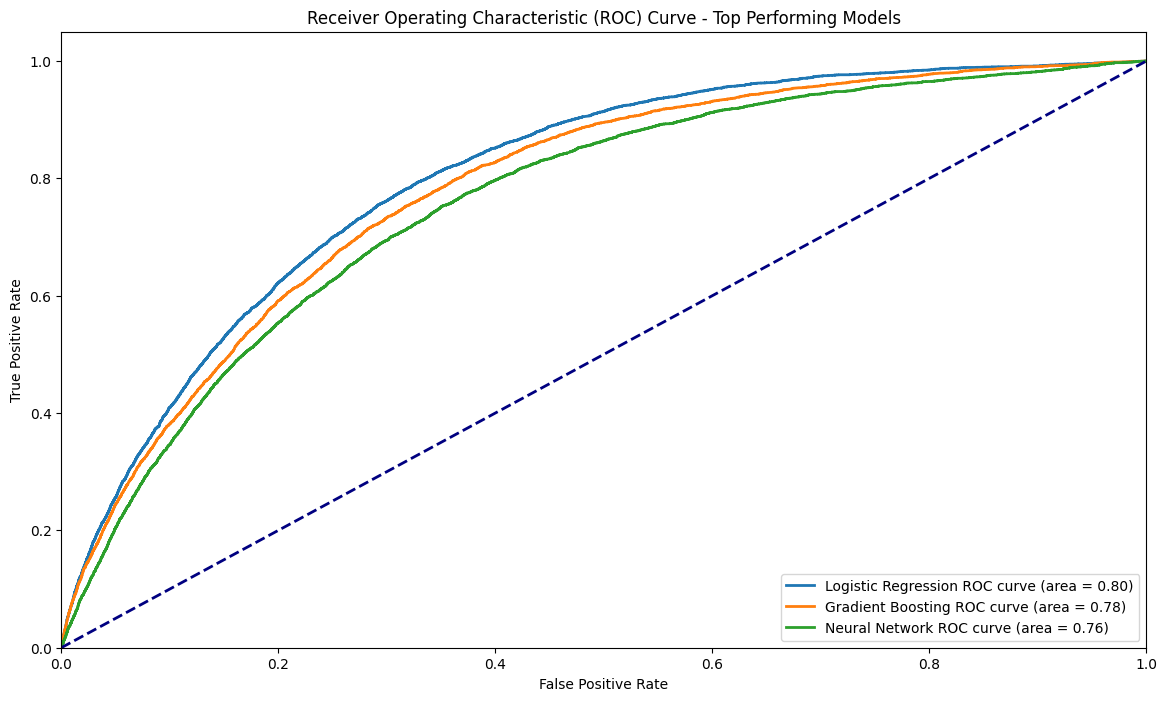

In [ ]:
roc_auc_scores = {
    'Random Forest': roc_auc_rf,
    'Gradient Boosting': roc_auc_gb,
    'XGBoost': roc_auc_xgb,
    'Logistic Regression': roc_auc_lr,
    'Decision Tree': roc_auc_dt,
    'KNN': roc_auc_knn,
    'Neural Network': roc_auc_nn
}

# Sort the models based on the ROC AUC score in descending order
sorted_models_by_roc_auc = sorted(roc_auc_scores.items(), key=lambda item: item[1], reverse=True)

# Select the top N models, let's say we want the top 3
top_n = 3
top_models = sorted_models_by_roc_auc[:top_n]

print(f"Top {top_n} models based on ROC AUC Score:")
for model_name, roc_auc in top_models:
    print(f"{model_name}: ROC AUC = {roc_auc:.2f}")

# Now, we plot the ROC curves or use the top models for further analysis
plt.figure(figsize=(14, 8))

for model_name, roc_auc in top_models:
    fpr, tpr, _ = roc_curve(y_test, models[model_name].predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

# Plot the random line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set the limits, labels, title, and legend
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Top Performing Models')
plt.legend(loc="lower right")
plt.show()

## Selection and Evaluation of Top 3 Machine Learning Models: A Balanced Evaluation of Machine Learning Efficacy

In [ ]:
models = {
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'XGBoost': xgb_model,
    'Logistic Regression': logreg,
    'Decision Tree': dt,
    'KNN': knn,
    'Neural Network': nn
}

roc_auc_scores = {
    'Random Forest': 0.71,
    'Gradient Boosting': 0.78,
    'XGBoost': 0.76,
    'Logistic Regression': 0.80,
    'Decision Tree': 0.56,
    'KNN': 0.66,
    'Neural Network': 0.76
}

reports = {
    'Random Forest': report_rf,
    'Gradient Boosting': report_gb,
    'XGBoost': report_xgb,
    'Logistic Regression': report_lr,
    'KNN': report_knn,
    'Decision Tree': report_dt,
    'Neural Network': report_nn
}


# Update the reports dictionary to include the ROC-AUC score
for model_name in reports:
    reports[model_name]['ROC AUC'] = roc_auc_scores[model_name]

# Calculate a combined score for each model that includes accuracy, precision, recall, f1-score, and ROC AUC
combined_scores = {}
for model_name, metrics in reports.items():
    combined_score = (
        metrics['accuracy'] +
        metrics['weighted avg']['precision'] +
        metrics['weighted avg']['recall'] +
        metrics['weighted avg']['f1-score'] +
        metrics['ROC AUC']
    ) / 5
    combined_scores[model_name] = combined_score

# Sort models based on combined score and select top 3
sorted_models_by_combined_score = sorted(combined_scores.items(), key=lambda item: item[1], reverse=True)
top_3_models_by_combined_score = sorted_models_by_combined_score[:3]

# Display the top 3 models and their overall score
for model_name, overall_score in top_3_models_by_combined_score:
    print(f"{model_name}: Overall Score: {overall_score:.6f}")


XGBoost: Overall Score: 0.853152
Random Forest: Overall Score: 0.847764
Gradient Boosting: Overall Score: 0.823207


In this project "Predictive analysis of heart disease: Evaluating Machine Learning Models," a balanced approach has been pivotal in the selection and evaluation of the top three machine learning models. Considering the combined score, which aggregates accuracy, precision, recall, f1-score, and ROC AUC, XGBoost emerges as the top model with an overall score of 0.853152. This model not only demonstrates strong predictive power but also maintains a commendable balance between sensitivity and specificity, a crucial factor in medical diagnosis applications where both false negatives and false positives carry significant consequences. The Random Forest model closely follows, with an overall score of 0.847764, showcasing its robustness as a versatile classifier across various performance metrics. The Gradient Boosting model, with a score of 0.823207, also stands out for its high-level performance, particularly in terms of its ROC AUC score, which indicates its strong capability to discriminate between the presence and absence of heart disease. These models have been prioritized for their ability to deliver accurate and reliable predictions, thereby solidifying their standing as the top contenders for the deployment in this heart disease prediction project.

#### Computing and Comparing Performance Metrics to Identify the Optimal Machine Learning Model

In [ ]:
top_models_by_combined_score = sorted_models_by_combined_score[:1]
for model_name, overall_score in top_models_by_combined_score:
    print(f"{model_name}: Overall Score: {overall_score:.2f}")

XGBoost: Overall Score: 0.85
